<a href="https://colab.research.google.com/github/masalaguru/project-portfolio/blob/main/Propensity_Score_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/240508_PSM_Rawdata.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            153 non-null    object 
 1   Category        153 non-null    object 
 2   Code            153 non-null    object 
 3   Size            153 non-null    object 
 4   Years_23        153 non-null    int64  
 5   Region          153 non-null    object 
 6   State           153 non-null    object 
 7   Employee_18     153 non-null    float64
 8   Sales_18        153 non-null    int64  
 9   Liability_18    153 non-null    int64  
 10  RnD_Expense_18  153 non-null    int64  
 11  Participation   153 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 14.5+ KB


In [ ]:
df

,Name,Category,Code,Size,Years_23,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation
0,(주)라이팩,소자부품,C26129,중소기업,5,수도권,서울,2.00000,0,0,0,비참여
1,HFR,장비(시스템),C26410,중견기업,9,수도권,경기,178.00000,104029651,36100208,1338667,참여
2,가온브로드밴드,장비(시스템),C26410,중견기업,4,수도권,경기,110.00000,0,0,0,비참여
3,고려오트론㈜,광선로(케이블),C26410,중소기업,27,전라권,광주,24.00000,13168471,9187521,473918,비참여
4,디오넷,장비(시스템),C26410,중소기업,26,수도권,서울,20.00000,18563032,4355263,617240,참여
...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,18,수도권,경기,52.00000,7753837,6041844,147982,비참여
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,25,수도권,경기,24.00000,6717349,3837641,496169,비참여
150,(주)큐테크,소자부품,M72919,중소기업,13,경상권,부산,33.00000,2577032,8009207,0,비참여
151,태림전자(주),장비(시스템),C26429,중소기업,50,수도권,경기,51.00000,18031524,1857408,598651,비참여


In [ ]:
pd.reset_option('display.float_format')

In [ ]:
df.isnull().sum(axis=0)

Name              0
Category          0
Code              0
Size              0
Years_23          0
Region            0
State             0
Employee_18       0
Sales_18          0
Liability_18      0
RnD_Expense_18    0
Participation     0
dtype: int64

# Data Preprocessing
* 광선로(케이블)데이터 제거
* 매출액이 0인 값의 데이터 제거
* 부채총액과 연구개발비의 0값은 그대로
* 범주형 변수를 더미변수로 변환 : 참여여부, 권역, 업종코드, 중분류






In [ ]:
df['Years_18'] = df['Years_23'] - 5
df.drop('Years_23',axis=1,inplace=True)
df

,Name,Category,Code,Size,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18
0,(주)라이팩,소자부품,C26129,중소기업,수도권,서울,2.0,0,0,0,비참여,0
1,HFR,장비(시스템),C26410,중견기업,수도권,경기,178.0,104029651,36100208,1338667,참여,4
2,가온브로드밴드,장비(시스템),C26410,중견기업,수도권,경기,110.0,0,0,0,비참여,-1
3,고려오트론㈜,광선로(케이블),C26410,중소기업,전라권,광주,24.0,13168471,9187521,473918,비참여,22
4,디오넷,장비(시스템),C26410,중소기업,수도권,서울,20.0,18563032,4355263,617240,참여,21
...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,수도권,경기,52.0,7753837,6041844,147982,비참여,13
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,수도권,경기,24.0,6717349,3837641,496169,비참여,20
150,(주)큐테크,소자부품,M72919,중소기업,경상권,부산,33.0,2577032,8009207,0,비참여,8
151,태림전자(주),장비(시스템),C26429,중소기업,수도권,경기,51.0,18031524,1857408,598651,비참여,45


In [ ]:
# "광선로(케이블)"인 행 제거
import pandas as pd
df = df[df['Category'] != '광선로(케이블)']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 152
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            143 non-null    object 
 1   Category        143 non-null    object 
 2   Code            143 non-null    object 
 3   Size            143 non-null    object 
 4   Region          143 non-null    object 
 5   State           143 non-null    object 
 6   Employee_18     143 non-null    float64
 7   Sales_18        143 non-null    int64  
 8   Liability_18    143 non-null    int64  
 9   RnD_Expense_18  143 non-null    int64  
 10  Participation   143 non-null    object 
 11  Years_18        143 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 14.5+ KB


In [ ]:
# 각 열에 값이 0인 개수
df['Employee_18'].eq(0).sum()

0

In [ ]:
df['Sales_18'].eq(0).sum()

6

In [ ]:
df['Liability_18'].eq(0).sum()

6

In [ ]:
df['RnD_Expense_18'].eq(0).sum()

24

In [ ]:
df = df[df['Sales_18'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    object 
 11  Years_18        137 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 13.9+ KB


In [ ]:
df['Participation'] = df['Participation'].apply(lambda x: 1 if x == '참여' else (0 if x == '비참여' else None))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 13.9+ KB


<ipython-input-132-414be8d63747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Participation'] = df['Participation'].apply(lambda x: 1 if x == '참여' else (0 if x == '비참여' else None))


In [ ]:
dummies = pd.get_dummies(df['Category'])
df.loc[:, 'Category_dum1'] = dummies['소자부품'].astype(int)
df.loc[:, 'Category_dum2'] = dummies['장비(시스템)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
 12  Category_dum1   137 non-null    int64  
 13  Category_dum2   137 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 16.1+ KB


<ipython-input-133-356e3e66048f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Category_dum1'] = dummies['소자부품'].astype(int)
<ipython-input-133-356e3e66048f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Category_dum2'] = dummies['장비(시스템)'].astype(int)


In [ ]:
df['Code'].value_counts()

Code
C26410    93
C26429    16
C28301     5
C26299     5
G46522     4
C27301     2
C26521     1
G46109     1
J61210     1
C26121     1
C29229     1
M70121     1
C28122     1
C26129     1
J58221     1
F42321     1
C26224     1
M72919     1
Name: count, dtype: int64

In [ ]:
df['Code'].str[:3].value_counts()

Code
C26    118
C28      6
G46      5
C27      2
J61      1
C29      1
M70      1
J58      1
F42      1
M72      1
Name: count, dtype: int64

In [ ]:
df['Code_C26'] = df['Code'].str.startswith('C26').astype(int)

In [ ]:
df['Code_C26'] = df['Code'].str.startswith('C26').astype(int)
df['Code_C27'] = df['Code'].str.startswith('C27').astype(int)
df['Code_C28'] = df['Code'].str.startswith('C28').astype(int)
df['Code_G46'] = df['Code'].str.startswith('G46').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
 12  Category_dum1   137 non-null    int64  
 13  Category_dum2   137 non-null    int64  
 14  Code_C26        137 non-null    int64  
 15  Code_C27        137 non-null    int64  
 16  Code_C28        137 non-null    int64  
 17  Code_G46        137 non-null    int64  


In [ ]:
df['Code_J61'] = df['Code'].str.startswith('J61').astype(int)
df['Code_C29'] = df['Code'].str.startswith('C29').astype(int)
df['Code_M70'] = df['Code'].str.startswith('M70').astype(int)
df['Code_J58'] = df['Code'].str.startswith('J58').astype(int)
df['Code_F42'] = df['Code'].str.startswith('F42').astype(int)
df['Code_M72'] = df['Code'].str.startswith('M72').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
 12  Category_dum1   137 non-null    int64  
 13  Category_dum2   137 non-null    int64  
 14  Code_C26        137 non-null    int64  
 15  Code_C27        137 non-null    int64  
 16  Code_C28        137 non-null    int64  
 17  Code_G46        137 non-null    int64  


In [ ]:
dummies = pd.get_dummies(df['Size'])
df.loc[:, 'Medium'] = dummies['중견기업'].astype(int)
df.loc[:, 'Small'] = dummies['중소기업'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
 12  Category_dum1   137 non-null    int64  
 13  Category_dum2   137 non-null    int64  
 14  Code_C26        137 non-null    int64  
 15  Code_C27        137 non-null    int64  
 16  Code_C28        137 non-null    int64  
 17  Code_G46        137 non-null    int64  


In [ ]:
df

,Name,Category,Code,Size,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small
1,HFR,장비(시스템),C26410,중견기업,수도권,경기,178.0,104029651,36100208,1338667,1,4,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,디오넷,장비(시스템),C26410,중소기업,수도권,서울,20.0,18563032,4355263,617240,1,21,0,1,1,0,0,0,0,0,0,0,0,0,0,1
7,신한네트웍스㈜,소자부품,C26410,중소기업,전라권,광주,35.0,1689638,3535867,105217,0,7,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8,아이오솔루션,소자부품,C27301,중소기업,전라권,광주,61.0,7738381,14399923,710688,0,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1
10,엑스빔테크(주),소자부품,C26410,중소기업,수도권,서울,6.0,785206,1018453,454525,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,수도권,경기,52.0,7753837,6041844,147982,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,1
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,수도권,경기,24.0,6717349,3837641,496169,0,20,0,1,1,0,0,0,0,0,0,0,0,0,0,1
150,(주)큐테크,소자부품,M72919,중소기업,경상권,부산,33.0,2577032,8009207,0,0,8,1,0,0,0,0,0,0,0,0,0,0,1,0,1
151,태림전자(주),장비(시스템),C26429,중소기업,수도권,경기,51.0,18031524,1857408,598651,0,45,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df

,Name,Category,Code,Size,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small
1,HFR,장비(시스템),C26410,중견기업,수도권,경기,178.0,104029651,36100208,1338667,1,4,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,디오넷,장비(시스템),C26410,중소기업,수도권,서울,20.0,18563032,4355263,617240,1,21,0,1,1,0,0,0,0,0,0,0,0,0,0,1
7,신한네트웍스㈜,소자부품,C26410,중소기업,전라권,광주,35.0,1689638,3535867,105217,0,7,1,0,1,0,0,0,0,0,0,0,0,0,0,1
8,아이오솔루션,소자부품,C27301,중소기업,전라권,광주,61.0,7738381,14399923,710688,0,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1
10,엑스빔테크(주),소자부품,C26410,중소기업,수도권,서울,6.0,785206,1018453,454525,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,수도권,경기,52.0,7753837,6041844,147982,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,1
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,수도권,경기,24.0,6717349,3837641,496169,0,20,0,1,1,0,0,0,0,0,0,0,0,0,0,1
150,(주)큐테크,소자부품,M72919,중소기업,경상권,부산,33.0,2577032,8009207,0,0,8,1,0,0,0,0,0,0,0,0,0,0,1,0,1
151,태림전자(주),장비(시스템),C26429,중소기업,수도권,경기,51.0,18031524,1857408,598651,0,45,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
dummies = pd.get_dummies(df['Region'])
df.loc[:, 'Region_dum1'] = dummies['수도권'].astype(int)
df.loc[:, 'Region_dum2'] = dummies['전라권'].astype(int)
df.loc[:, 'Region_dum3'] = dummies['충청권'].astype(int)
df.loc[:, 'Region_dum4'] = dummies['경상권'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            137 non-null    object 
 1   Category        137 non-null    object 
 2   Code            137 non-null    object 
 3   Size            137 non-null    object 
 4   Region          137 non-null    object 
 5   State           137 non-null    object 
 6   Employee_18     137 non-null    float64
 7   Sales_18        137 non-null    int64  
 8   Liability_18    137 non-null    int64  
 9   RnD_Expense_18  137 non-null    int64  
 10  Participation   137 non-null    int64  
 11  Years_18        137 non-null    int64  
 12  Category_dum1   137 non-null    int64  
 13  Category_dum2   137 non-null    int64  
 14  Code_C26        137 non-null    int64  
 15  Code_C27        137 non-null    int64  
 16  Code_C28        137 non-null    int64  
 17  Code_G46        137 non-null    int64  


In [ ]:
df.loc[:, 'Employee_18'] = df['Employee_18'].astype(int)
df.dtypes

Name               object
Category           object
Code               object
Size               object
Region             object
State              object
Employee_18       float64
Sales_18            int64
Liability_18        int64
RnD_Expense_18      int64
Participation       int64
Years_18            int64
Category_dum1       int64
Category_dum2       int64
Code_C26            int64
Code_C27            int64
Code_C28            int64
Code_G46            int64
Code_J61            int64
Code_C29            int64
Code_M70            int64
Code_J58            int64
Code_F42            int64
Code_M72            int64
Medium              int64
Small               int64
Region_dum1         int64
Region_dum2         int64
Region_dum3         int64
Region_dum4         int64
dtype: object

In [ ]:
import numpy as np
# 각 컬럼별 최솟값 계산
min_nonzero_Employee_18 = df['Years_18'][df['Years_18'] > 0].min()
min_nonzero_Employee_18 = df['Employee_18'][df['Employee_18'] > 0].min()
min_nonzero_Sales_18 = df['Sales_18'][df['Sales_18'] > 0].min()
min_nonzero_Debt_18 = df['Liability_18'][df['Liability_18'] > 0].min()
min_nonzero_RnD_18 = df['RnD_Expense_18'][df['RnD_Expense_18'] > 0].min()
# 최소값의 절반을 이동값으로 하여 로그변환하고 데이터프레임에 새로운 컬럼으로 추가
df.loc[:, 'Years_18_log'] = np.log(df['Years_18'] + min_nonzero_Employee_18 / 2)
df.loc[:, 'Employee_18_log'] = np.log(df['Employee_18'] + min_nonzero_Employee_18 / 2)
df.loc[:, 'Sales_18_log'] = np.log(df['Sales_18'] + min_nonzero_Sales_18 / 2)
df.loc[:, 'Liability_18_log'] = np.log(df['Liability_18'] + min_nonzero_Debt_18 / 2)
df.loc[:, 'RnD_Expense_18_log'] = np.log(df['RnD_Expense_18'] + min_nonzero_RnD_18 / 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

In [ ]:
df.to_excel('240508_PSM_전처리.xlsx', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

# 동질성 여부 확인
*  기초통계량비교(평균, 표준편차, 표준화된 평균차이)
*  로그변환후 정규분포여부 확인 => 비모수검정(연속형변수)
*  카이제곱 검정(범주형변수)=>





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

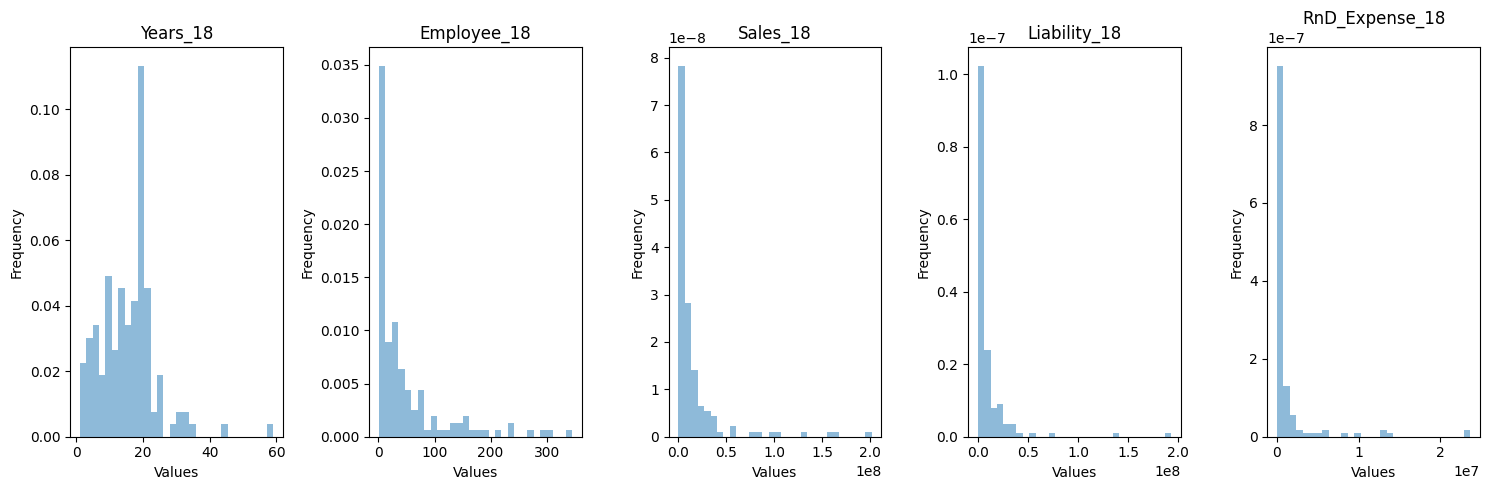

In [ ]:
import matplotlib.pyplot as plt
columns = ['Years_18','Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18']
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    data = df[col]
    axes[i].hist(data, bins=30, density=True, alpha=0.5)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

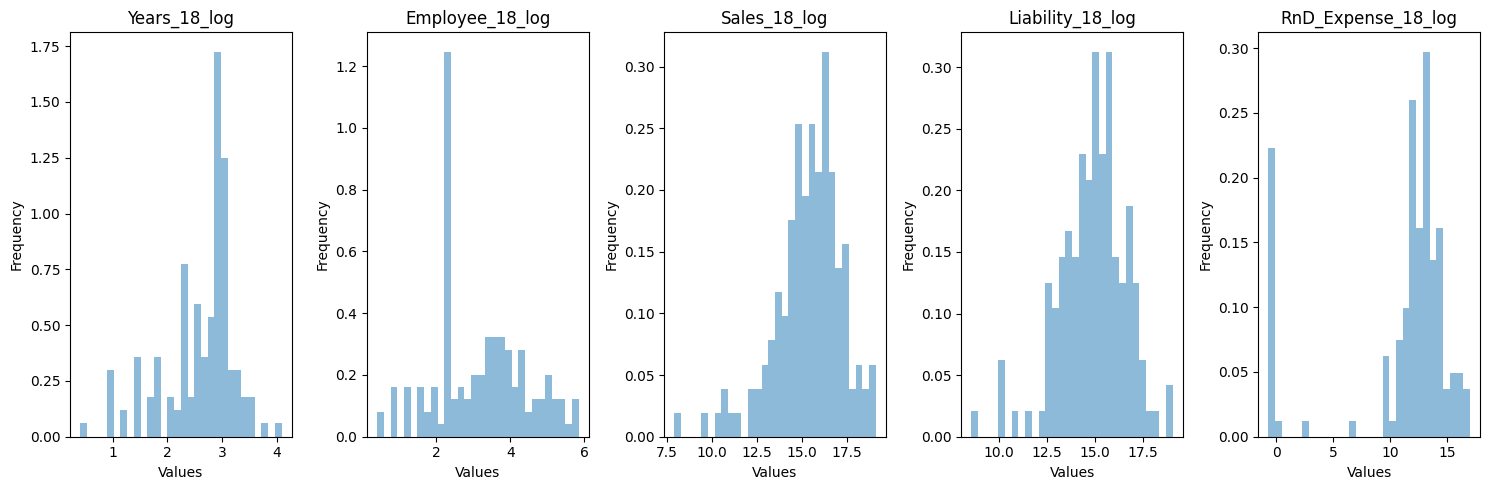

In [ ]:
import matplotlib.pyplot as plt
columns = ['Years_18_log','Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    data = df[col]
    axes[i].hist(data, bins=30, density=True, alpha=0.5)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

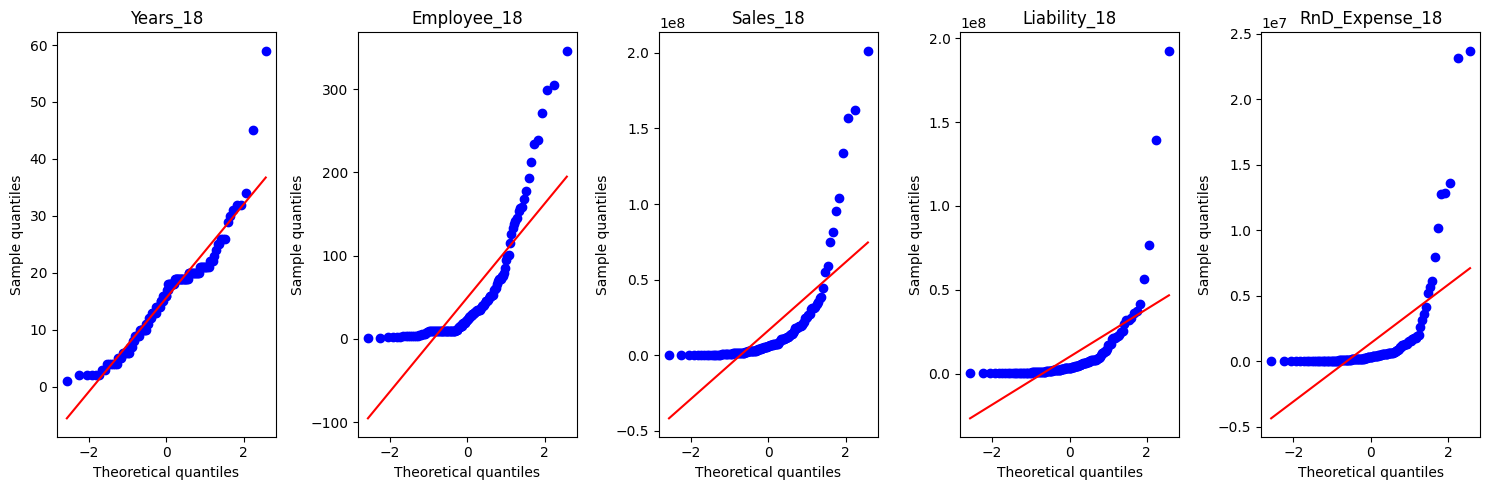

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
columns = ['Years_18', 'Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18']
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    data = df[col]
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Theoretical quantiles')
    axes[i].set_ylabel('Sample quantiles')
plt.tight_layout()
plt.show()

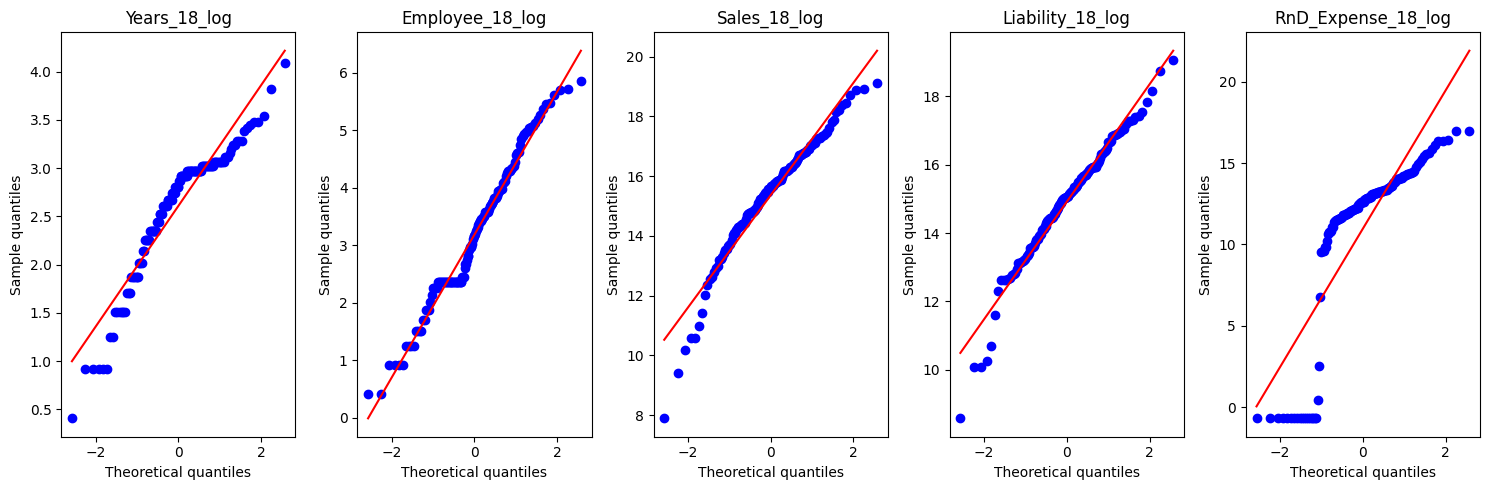

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'columns' is the list of column names
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']

# Create subplots for Q-Q plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Loop through each column and create Q-Q plot
for i, col in enumerate(columns):
    data = df[col]
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Theoretical quantiles')
    axes[i].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame and 'columns' is the list of column names you want to test
columns = ['Years_18', 'Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18']

for col in columns:
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(df[col])

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print(f"{col}: 정규분포를 따르지 않습니다")
    else:
        print(f"{col}: 정규분포를 따릅니다")



Years_18: 정규분포를 따르지 않습니다
Employee_18: 정규분포를 따르지 않습니다
Sales_18: 정규분포를 따르지 않습니다
Liability_18: 정규분포를 따르지 않습니다
RnD_Expense_18: 정규분포를 따르지 않습니다


In [ ]:
df

,Name,Category,Code,Size,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
1,HFR,장비(시스템),C26410,중견기업,수도권,경기,178.0,104029651,36100208,1338667,1,4,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.504077,5.184589,18.460195,17.401858,14.107185
4,디오넷,장비(시스템),C26410,중소기업,수도권,서울,20.0,18563032,4355263,617240,1,21,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.068053,3.020425,16.736731,15.287299,13.333014
7,신한네트웍스㈜,소자부품,C26410,중소기업,전라권,광주,35.0,1689638,3535867,105217,0,7,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.014903,3.569533,14.340555,15.078966,11.563785
8,아이오솔루션,소자부품,C27301,중소기업,전라권,광주,61.0,7738381,14399923,710688,0,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.351375,4.119037,15.861819,16.482855,13.473989
10,엑스빔테크(주),소자부품,C26410,중소기업,수도권,서울,6.0,785206,1018453,454525,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1.871802,1.871802,13.574842,13.835520,13.027009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,수도권,경기,52.0,7753837,6041844,147982,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2.602690,3.960813,15.863814,15.614511,11.904849
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,수도권,경기,24.0,6717349,3837641,496169,0,20,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.020425,3.198673,15.720338,15.160826,13.114673
150,(주)큐테크,소자부품,M72919,중소기업,경상권,부산,33.0,2577032,8009207,0,0,8,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,2.140066,3.511545,14.762497,15.896322,-0.693147
151,태림전자(주),장비(시스템),C26429,중소기업,수도권,경기,51.0,18031524,1857408,598651,0,45,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.817712,3.941582,16.707682,14.435638,13.302435


In [ ]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


### 기초통계량

In [ ]:
selected_cols = ['Years_18', 'Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18','Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
summary_stats = df[selected_cols].describe()
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
summary_stats

,Years_18,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
count,137,137,137,137,137,137,137,137,137,137
mean,16,50,16463410,9957582,1361555,3,3,15,15,11
std,9,68,31306025,22425196,3550281,1,1,2,2,5
min,1,1,1792,3515,0,0,0,8,9,-1
25%,10,10,1804926,1093461,95357,2,2,14,14,11
50%,16,23,5978599,3441826,307789,3,3,16,15,13
75%,20,53,16304964,8348002,789180,3,4,17,16,14
max,59,346,201387811,192664788,23687041,4,6,19,19,17


In [ ]:
# 수치형 열만 선택하여 요약 통계 계산
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
numeric_cols = df.select_dtypes(include=['number'])
summary_stats = numeric_cols.describe()
summary_stats

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,49.73,16463410.27,9957581.65,1361554.88,0.11,15.60,0.58,0.42,0.86,0.01,0.04,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.93,0.66,0.17,0.14,0.04,2.61,3.19,15.36,14.91,10.98
std,67.53,31306024.85,22425196.37,3550280.85,0.31,8.53,0.49,0.49,0.35,0.12,0.21,0.19,0.09,0.09,0.09,0.09,0.09,0.09,0.25,0.25,0.48,0.38,0.35,0.19,0.65,1.24,1.91,1.73,5.00
min,1.00,1792.00,3515.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.41,7.90,8.57,-0.69
25%,10.00,1804926.00,1093461.00,95357.00,0.00,10.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.35,2.35,14.41,13.91,11.47
50%,23.00,5978599.00,3441826.00,307789.00,0.00,16.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.80,3.16,15.60,15.05,12.64
75%,53.00,16304964.00,8348002.00,789180.00,0.00,20.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,3.02,3.98,16.61,15.94,13.58
max,346.00,201387811.00,192664788.00,23687041.00,1.00,59.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.09,5.85,19.12,19.08,16.98


In [ ]:
# 참여여부 기준으로 평균 비교
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
result = df.groupby('Participation').mean(numeric_only=True)
result

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44.34,14665421.39,9152230.25,1175557.10,15.85,0.57,0.43,0.84,0.02,0.05,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.06,0.94,0.67,0.16,0.13,0.04,2.64,3.08,15.25,14.82,10.68
1,93.60,31087053.13,16507773.07,2874336.80,13.53,0.73,0.27,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.87,0.53,0.27,0.20,0.00,2.38,4.03,16.28,15.68,13.35


In [ ]:
# 참여여부 기준으로 표준편차 비교
pd.set_option('display.max_columns', None)
result = df.groupby('Participation').std(numeric_only=True)
result

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,63.70,30642995.42,22877784.58,3484640.24,8.64,0.50,0.50,0.36,0.13,0.22,0.20,0.09,0.09,0.09,0.09,0.09,0.09,0.23,0.23,0.47,0.36,0.34,0.20,0.61,1.20,1.80,1.68,5.04
1,83.15,33878779.20,17606214.89,3839588.11,7.50,0.46,0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35,0.35,0.52,0.46,0.41,0.00,0.89,1.25,2.50,1.97,4.04


In [ ]:
selected_columns = ['Years_18', 'Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18','Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
result = df.groupby('Participation')[selected_columns].mean()
result

,Years_18,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
Participation,,,,,,,,,,
0,15.85,44.34,14665421.39,9152230.25,1175557.10,2.64,3.08,15.25,14.82,10.68
1,13.53,93.60,31087053.13,16507773.07,2874336.80,2.38,4.03,16.28,15.68,13.35


In [ ]:
selected_columns = ['Years_18', 'Employee_18', 'Sales_18', 'Liability_18', 'RnD_Expense_18','Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
result = df.groupby('Participation')[selected_columns].std()
result

,Years_18,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log
Participation,,,,,,,,,,
0,8.64,63.70,30642995.42,22877784.58,3484640.24,0.61,1.20,1.80,1.68,5.04
1,7.50,83.15,33878779.20,17606214.89,3839588.11,0.89,1.25,2.50,1.97,4.04


### 차이검정

In [ ]:
from scipy.stats import mannwhitneyu

# df에서 참여여부에 따라 데이터를 나눕니다.
group1 = df[df['Participation'] == 0]['Years_18_log']
group2 = df[df['Participation'] == 1]['Years_18_log']

# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(group1, group2)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")


from scipy.stats import mannwhitneyu

# df에서 참여여부에 따라 데이터를 나눕니다.
group1 = df[df['Participation'] == 0]['Employee_18_log']
group2 = df[df['Participation'] == 1]['Employee_18_log']

# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(group1, group2)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 상시근로자수의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 상시근로자수의 중앙값은 서로 동일합니다.")

from scipy.stats import mannwhitneyu

# df에서 참여여부에 따라 데이터를 나눕니다.
group1 = df[df['Participation'] == 0]['Sales_18_log']
group2 = df[df['Participation'] == 1]['Sales_18_log']

# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(group1, group2)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

from scipy.stats import mannwhitneyu

# df에서 참여여부에 따라 데이터를 나눕니다.
group1 = df[df['Participation'] == 0]['Liability_18_log']
group2 = df[df['Participation'] == 1]['Liability_18_log']

# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(group1, group2)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 부채총액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 부채총액의 중앙값은 서로 동일합니다.")

from scipy.stats import mannwhitneyu

# df에서 참여여부에 따라 데이터를 나눕니다.
group1 = df[df['Participation'] == 0]['RnD_Expense_18_log']
group2 = df[df['Participation'] == 1]['RnD_Expense_18_log']

# Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(group1, group2)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Statistic: 993.0
p-value: 0.5923945132432562
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Statistic: 508.0
p-value: 0.004905782371993181
귀무가설을 기각합니다. 두 그룹의 상시근로자수의 중앙값은 서로 다릅니다.
Statistic: 467.0
p-value: 0.0020373011817517335
귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.
Statistic: 585.0
p-value: 0.02312678170138872
귀무가설을 기각합니다. 두 그룹의 부채총액의 중앙값은 서로 다릅니다.
Statistic: 361.5
p-value: 0.00013546910794966634
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


### 카이제곱 검정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Participation'], df['Category_dum1'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square Test Results:
Chi-square value: 0.933859199741156
P-value: 0.3338621182199527


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Participation'], df['Category_dum2'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square Test Results:
Chi-square value: 0.933859199741156
P-value: 0.3338621182199527


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Participation'], df['Code_C26'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square Test Results:
Chi-square value: 1.5651273136300041
P-value: 0.21091605933919244


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Participation'], df['Medium'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square Test Results:
Chi-square value: 0.3229945782103826
P-value: 0.5698135464269268


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Participation'], df['Small'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square Test Results:")
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square Test Results:
Chi-square value: 0.3229945782103826
P-value: 0.5698135464269268


# 성향점수 추정 후 매칭

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

### from sklearn.linear_model import LogisticRegression

In [ ]:
# 로지스틱회귀분석으로 성향점수 계산
from sklearn.linear_model import LogisticRegression
X = df[['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']]
y = df['Participation']
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [ ]:
lr.coef_.ravel()

array([-0.94862191,  0.71528273,  0.17209736, -0.16638201,  0.09805869,
        0.44640931, -0.44628307,  0.90717601, -0.22612982, -0.16336531,
       -0.22624847, -0.02713332, -0.16807481, -0.03526698, -0.01316866,
       -0.02890095, -0.01876144, -0.16036891,  0.16049515, -0.26339651,
        0.02560958,  0.51951718, -0.28160401])

In [ ]:
X.columns.to_numpy()

array(['Years_18_log', 'Employee_18_log', 'Sales_18_log',
       'Liability_18_log', 'RnD_Expense_18_log', 'Category_dum1',
       'Category_dum2', 'Code_C26', 'Code_C28', 'Code_C27', 'Code_G46',
       'Code_J61', 'Code_C29', 'Code_M70', 'Code_J58', 'Code_F42',
       'Code_M72', 'Medium', 'Small', 'Region_dum1', 'Region_dum2',
       'Region_dum3', 'Region_dum4'], dtype=object)

In [ ]:
# 컬럼별 계수 확인
pd.set_option('display.float_format', '{:.2e}'.format)
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
coeffs

,column,coeff
0,Years_18_log,-9.49e-01
1,Employee_18_log,7.15e-01
2,Sales_18_log,1.72e-01
3,Liability_18_log,-1.66e-01
4,RnD_Expense_18_log,9.81e-02
5,Category_dum1,4.46e-01
6,Category_dum2,-4.46e-01
7,Code_C26,9.07e-01
8,Code_C28,-2.26e-01
9,Code_C27,-1.63e-01


In [ ]:
# Set display options to show full precision
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x))


coeffs = pd.DataFrame({
    'column': X.columns.to_numpy(),
    'coeff': lr.coef_.ravel(),
})
coeffs

,column,coeff
0,Years_18_log,-0.94862
1,Employee_18_log,0.71528
2,Sales_18_log,0.17210
3,Liability_18_log,-0.16638
4,RnD_Expense_18_log,0.09806
5,Category_dum1,0.44641
6,Category_dum2,-0.44628
7,Code_C26,0.90718
8,Code_C28,-0.22613
9,Code_C27,-0.16337


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
# Logistic 회귀 모델 피팅
X = df[['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']]
y = df['Participation']
lr = LogisticRegression()
lr.fit(X, y)

# 성향 점수 추정
df['logistic_ps'] = lr.predict_proba(X)[:, 1]
df

,Name,Category,Code,Size,Region,State,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Participation,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps
1,HFR,장비(시스템),C26410,중견기업,수도권,경기,178.00000,104029651,36100208,1338667,1,4,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.50408,5.18459,18.46020,17.40186,14.10719,0.35570
4,디오넷,장비(시스템),C26410,중소기업,수도권,서울,20.00000,18563032,4355263,617240,1,21,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.06805,3.02042,16.73673,15.28730,13.33301,0.03471
7,신한네트웍스㈜,소자부품,C26410,중소기업,전라권,광주,35.00000,1689638,3535867,105217,0,7,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.01490,3.56953,14.34056,15.07897,11.56378,0.21362
8,아이오솔루션,소자부품,C27301,중소기업,전라권,광주,61.00000,7738381,14399923,710688,0,10,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.35138,4.11904,15.86182,16.48286,13.47399,0.11063
10,엑스빔테크(주),소자부품,C26410,중소기업,수도권,서울,6.00000,785206,1018453,454525,0,6,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1.87180,1.87180,13.57484,13.83552,13.02701,0.07928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,(주)다우텔레콤,장비(시스템),C26224,중소기업,수도권,경기,52.00000,7753837,6041844,147982,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2.60269,3.96081,15.86381,15.61451,11.90485,0.07202
149,(주)에스엘테크놀로지,장비(시스템),C26299,중소기업,수도권,경기,24.00000,6717349,3837641,496169,0,20,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.02042,3.19867,15.72034,15.16083,13.11467,0.03462
150,(주)큐테크,소자부품,M72919,중소기업,경상권,부산,33.00000,2577032,8009207,0,0,8,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,2.14007,3.51155,14.76250,15.89632,-0.69315,0.01867
151,태림전자(주),장비(시스템),C26429,중소기업,수도권,경기,51.00000,18031524,1857408,598651,0,45,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3.81771,3.94158,16.70768,14.43564,13.30243,0.03754


In [ ]:
# 최근접 매칭
matched_data = df[df['Participation'] == 1].copy()  # 투입 그룹만 선택
matched_data = matched_data.sample(frac=1)  # 데이터를 섞음
control_data = df[df['Participation'] == 0].copy()

# 최근접 이웃 모델 피팅
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(control_data[['logistic_ps']])

# 투입 그룹의 각 샘플에 대해 최근접 이웃 찾기
distances, indices = nn_model.kneighbors(matched_data[['logistic_ps']])

# 매칭된 샘플들만 선택하여 새로운 데이터프레임 생성
matched_indices = indices.flatten()
matched_df = pd.concat([matched_data, control_data.iloc[matched_indices]])

In [ ]:
# 'Name' 컬럼의 중복되는 값을 확인
duplicated_values = matched_data[matched_data.duplicated('Name', keep=False)]
print("Duplicated values in 'Name' column:")
print(duplicated_values['Name'])

Duplicated values in 'Name' column:
Series([], Name: Name, dtype: object)


In [ ]:
# 엑셀 파일로 저장
matched_df.to_excel("240508_matched_logistic.xlsx", index=False)

In [ ]:
import pandas as pd
df5 = pd.read_excel('/content/240508_matched_logistic.xlsx')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

# 균형화 검정

### logistic_ps

In [ ]:
Parti = df[df.Participation==1]
Non_parti = df[df.Participation==0]

Parti5 = df5[df5.Participation==1]
Non_parti5 = df5[df5.Participation==0]

In [ ]:
df5.groupby('Participation').mean(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,85.26667,36092741.60000,16973438.53333,3678664.33333,10.73333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.60000,0.33333,0.06667,0.00000,2.16763,3.82353,15.92751,15.39779,13.46397,0.26113
1,93.60000,31087053.13333,16507773.06667,2874336.80000,13.53333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.53333,0.26667,0.20000,0.00000,2.38022,4.02578,16.27696,15.67554,13.35188,0.26814


In [ ]:
df5.groupby('Participation').std(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98.12562,67698773.17309,26509490.35422,8133670.27826,7.50682,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.50709,0.48795,0.25820,0.00000,0.77723,1.22090,1.95961,1.76074,1.72569,0.15929
1,83.14600,33878779.19879,17606214.89470,3839588.10660,7.50111,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.51640,0.45774,0.41404,0.00000,0.89379,1.25033,2.50445,1.96613,4.04358,0.16522


In [ ]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df5[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


In [ ]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti5['Years_18_log'], Non_parti5['Years_18_log'])
print("Years_18_log - Statistic:", statistic)
print("Years_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti5['Sales_18_log'], Non_parti5['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti5['RnD_Expense_18'], Non_parti5['RnD_Expense_18'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_18_log - Statistic: 137.0
Years_18_log - p-value: 0.317560258874383
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 141.0
Sales_18_log - p-value: 0.24532741946069136
귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.
RnD_Expense_18_log - Statistic: 158.0
RnD_Expense_18_log - p-value: 0.061882566750008874
귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.


In [ ]:
from scipy.stats import levene, bartlett

participating = df5[df5['Participation'] == 1]['Employee_18_log']
non_participating = df5[df5['Participation'] == 0]['Employee_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df5[df5['Participation'] == 1]['Employee_18_log']
non_participating = df5[df5['Participation'] == 0]['Employee_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.008113752562866734
p-value: 0.9288677967688462

Bartlett's test:
Statistic: 0.007670068023318629
p-value: 0.9302113535849399
t-statistic: 0.44822971485207025
p-value: 0.6574367368861258
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [ ]:
from scipy.stats import levene, bartlett

participating = df5[df5['Participation'] == 1]['Liability_18_log']
non_participating = df5[df5['Participation'] == 0]['Liability_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df5[df5['Participation'] == 1]['Liability_18_log']
non_participating = df5[df5['Participation'] == 0]['Liability_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.0002011937208763436
p-value: 0.9887835510572179

Bartlett's test:
Statistic: 0.16421523603048724
p-value: 0.6853049336253665
t-statistic: 0.4075720297130852
p-value: 0.6866874139177241
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [ ]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df5[df5['Participation'] == 1][columns_of_interest]
control_covariates = df5[df5['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,0.25383
Employee_18_log,0.16367
Sales_18_log,0.15541
Liability_18_log,0.14882
RnD_Expense_18_log,-0.03606
Category_dum1,0.00000
Category_dum2,0.00000
Code_C26,NaN
Code_C28,NaN
Code_C27,NaN


In [ ]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df[df['Participation'] == 1][columns_of_interest]
control_covariates = df[df['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df

Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.33351
Employee_18_log,0.76953
Sales_18_log,0.47176
Liability_18_log,0.46743
RnD_Expense_18_log,0.58353
Category_dum1,0.35085
Category_dum2,-0.35085
Code_C26,0.60490
Code_C28,-0.32031
Code_C27,-0.18182


<Figure size 1900x1000 with 0 Axes>

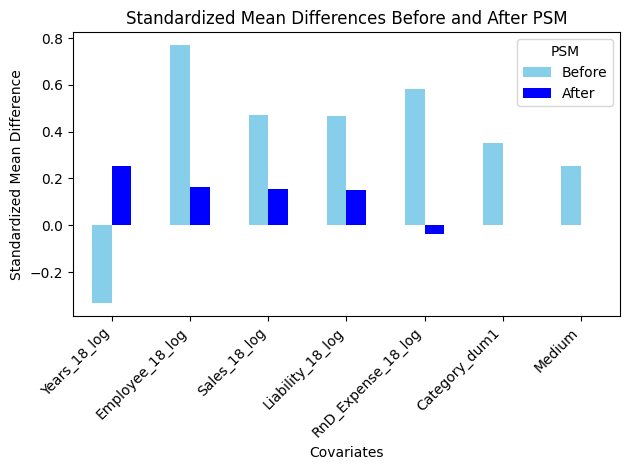

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1','Medium']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df5[df5['Participation'] == 1][columns_of_interest]
control_covariates_after = df5[df5['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

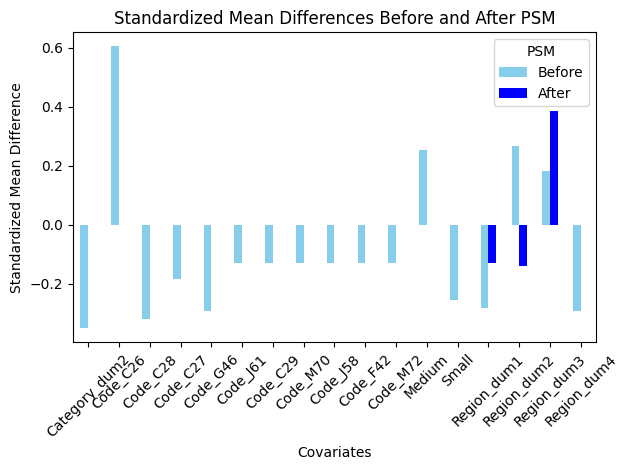

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4'
]

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df5[df5['Participation'] == 1][columns_of_interest]
control_covariates_after = df5[df5['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

### logistic_ps1

In [ ]:
# Years_18_log + Employee_18_log + Sales_18_log + Debt_18_log + RnD_18_log + Category_dum1  + Code_C26 + Code_C28 + Code_C27 + Code_G46 + J61210 + C29229 + M70121 + J58221 + F42321  + Medium + 수도권 + 전라권 + 충청권
import pandas as pd
df1 = pd.read_excel('/content/240508_matchedlogistic1.xlsx')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

In [ ]:
Parti = df[df.Participation==1]
Non_parti = df[df.Participation==0]

Parti1 = df1[df1.Participation==1]
Non_parti1 = df1[df1.Participation==0]

In [ ]:
df1.groupby('Participation').mean(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,87.73333,28528383.86667,13360898.20000,2532090.20000,13.33333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06667,0.93333,0.73333,0.20000,0.06667,0.00000,2.41065,4.00464,16.14553,15.49330,13.43550,0.06667,0.28242,0.26056,0.22796,0.28242,1.00000,8.00000
1,93.60000,31087053.13333,16507773.06667,2874336.80000,13.53333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.53333,0.26667,0.20000,0.00000,2.38022,4.02578,16.27696,15.67554,13.35188,0.13333,0.32642,0.25445,0.24013,0.32642,1.00000,8.00000


In [ ]:
df1.groupby('Participation').std(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,90.40264,50344789.83746,20434031.72585,6011899.29541,8.49089,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.25820,0.25820,0.45774,0.41404,0.25820,0.00000,0.73918,1.05909,1.63596,1.53112,1.52357,0.25820,0.18484,0.17195,0.16642,0.18484,0.00000,4.47214
1,83.14600,33878779.19879,17606214.89470,3839588.10660,7.50111,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.51640,0.45774,0.41404,0.00000,0.89379,1.25033,2.50445,1.96613,4.04358,0.35187,0.22123,0.17001,0.15889,0.22123,0.00000,4.47214


In [ ]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df1[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


In [ ]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti1['Years_18_log'], Non_parti1['Years_18_log'])
print("Years_18_log - Statistic:", statistic)
print("Years_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti1['Sales_18_log'], Non_parti1['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

# 부채총액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti1['Liability_18_log'], Non_parti1['Liability_18_log'])
print("Liability_18_log - Statistic:", statistic)
print("Liability_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")


# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti1['RnD_Expense_18'], Non_parti1['RnD_Expense_18'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_18_log - Statistic: 124.5
Years_18_log - p-value: 0.6319959380827587
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 133.0
Sales_18_log - p-value: 0.4067868333984651
귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.
Liability_18_log - Statistic: 123.0
Liability_18_log - p-value: 0.6783024655972324
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
RnD_Expense_18_log - Statistic: 155.0
RnD_Expense_18_log - p-value: 0.08149464839345506
귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                137 non-null    object 
 1   Category            137 non-null    object 
 2   Code                137 non-null    object 
 3   Size                137 non-null    object 
 4   Region              137 non-null    object 
 5   State               137 non-null    object 
 6   Employee_18         137 non-null    float64
 7   Sales_18            137 non-null    int64  
 8   Liability_18        137 non-null    int64  
 9   RnD_Expense_18      137 non-null    int64  
 10  Participation       137 non-null    int64  
 11  Years_18            137 non-null    int64  
 12  Category_dum1       137 non-null    int64  
 13  Category_dum2       137 non-null    int64  
 14  Code_C26            137 non-null    int64  
 15  Code_C27            137 non-null    int64  
 16  Code_C28     

In [ ]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Years_18_log'], Non_parti['Years_18_log'])
print("Years_23_log - Statistic:", statistic)
print("Years_23_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Sales_18_log'], Non_parti['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

# 부채총액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Liability_18_log'], Non_parti['Liability_18_log'])
print("Liability_18_log - Statistic:", statistic)
print("Liability_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")



# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['RnD_Expense_18_log'], Non_parti['RnD_Expense_18_log'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_23_log - Statistic: 837.0
Years_23_log - p-value: 0.5923945132432562
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 1363.0
Sales_18_log - p-value: 0.0020373011817517335
귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.
Liability_18_log - Statistic: 1245.0
Liability_18_log - p-value: 0.02312678170138872
귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.
RnD_Expense_18_log - Statistic: 1468.5
RnD_Expense_18_log - p-value: 0.00013546910794966634
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


In [ ]:
from scipy.stats import levene, bartlett

participating = df1[df1['Participation'] == 1]['Employee_18_log']
non_participating = df1[df1['Participation'] == 0]['Employee_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df1[df1['Participation'] == 1]['Employee_18_log']
non_participating = df1[df1['Participation'] == 0]['Employee_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.5014484098236048
p-value: 0.48471807396786937

Bartlett's test:
Statistic: 0.3707873799767909
p-value: 0.5425753911408624
t-statistic: 0.04997657059613804
p-value: 0.960495870085304
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [208]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1','Medium', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Small','Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df1[df1['Participation'] == 1][columns_of_interest]
control_covariates = df1[df1['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.03710
Employee_18_log,0.01825
Sales_18_log,0.06213
Liability_18_log,0.10342
RnD_Expense_18_log,-0.02737
Category_dum1,0.00000
Medium,0.21602
Category_dum2,0.00000
Code_C26,NaN
Code_C28,NaN


In [210]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1','Medium', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Small','Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df[df['Participation'] == 1][columns_of_interest]
control_covariates = df[df['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.33351
Employee_18_log,0.76953
Sales_18_log,0.47176
Liability_18_log,0.46743
RnD_Expense_18_log,0.58353
Category_dum1,0.35085
Medium,0.25436
Category_dum2,-0.35085
Code_C26,0.60490
Code_C28,-0.32031


<Figure size 1900x1000 with 0 Axes>

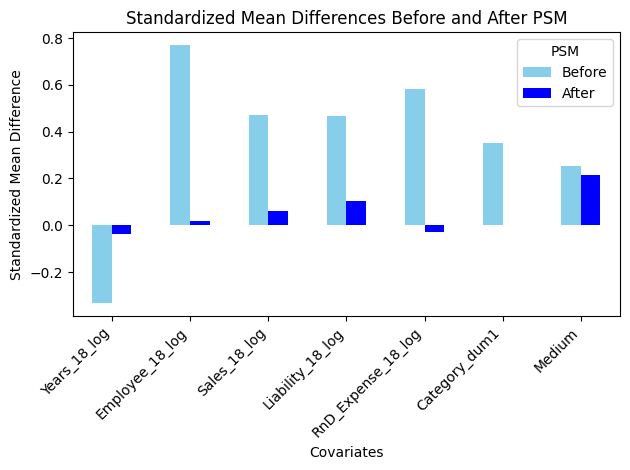

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1','Medium']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df1[df1['Participation'] == 1][columns_of_interest]
control_covariates_after = df1[df1['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

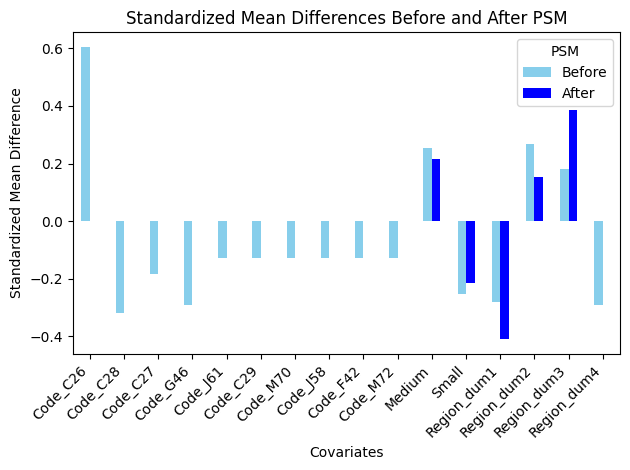

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df1[df1['Participation'] == 1][columns_of_interest]
control_covariates_after = df1[df1['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

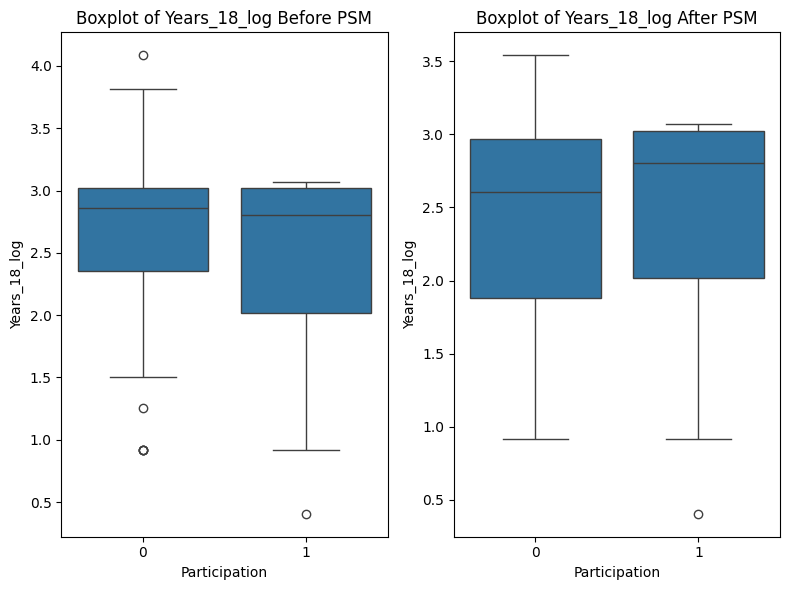

In [215]:
plt.figure(figsize=(8, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Participation', y='Years_18_log')
plt.title('Boxplot of Years_18_log Before PSM')
plt.xlabel('Participation')
plt.ylabel('Years_18_log')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Participation', y='Years_18_log')
plt.title('Boxplot of Years_18_log After PSM')
plt.xlabel('Participation')
plt.ylabel('Years_18_log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


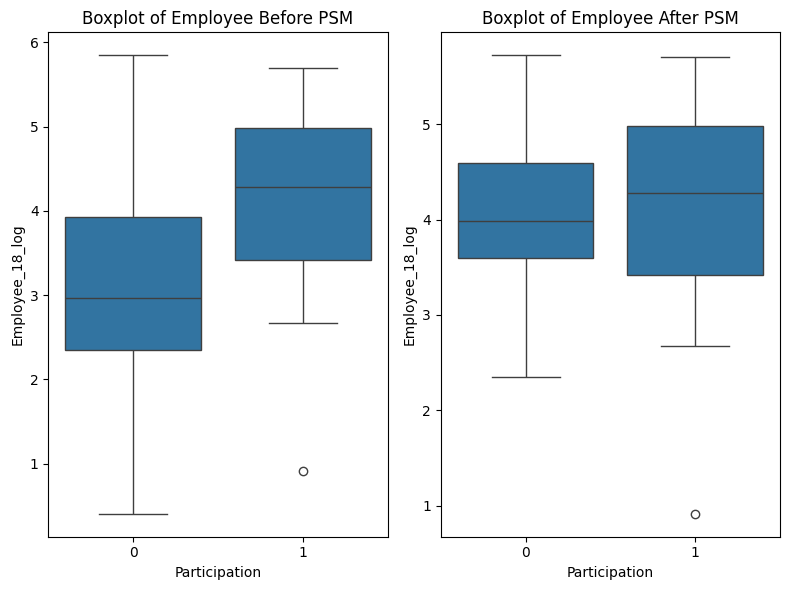

In [216]:
plt.figure(figsize=(8, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Participation', y='Employee_18_log')
plt.title('Boxplot of Employee Before PSM')
plt.xlabel('Participation')
plt.ylabel('Employee_18_log')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Participation', y='Employee_18_log')
plt.title('Boxplot of Employee After PSM')
plt.xlabel('Participation')
plt.ylabel('Employee_18_log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

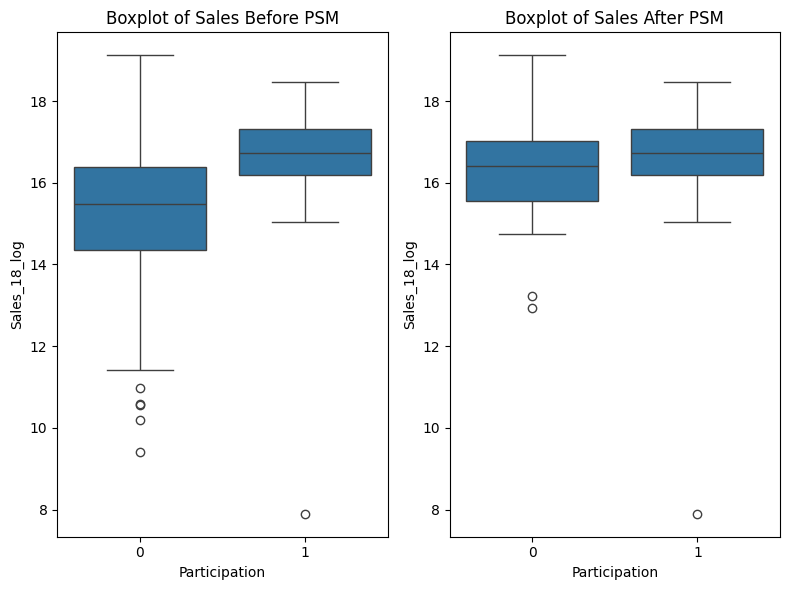

In [217]:
plt.figure(figsize=(8, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Participation', y='Sales_18_log')
plt.title('Boxplot of Sales Before PSM')
plt.xlabel('Participation')
plt.ylabel('Sales_18_log')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Participation', y='Sales_18_log')
plt.title('Boxplot of Sales After PSM')
plt.xlabel('Participation')
plt.ylabel('Sales_18_log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

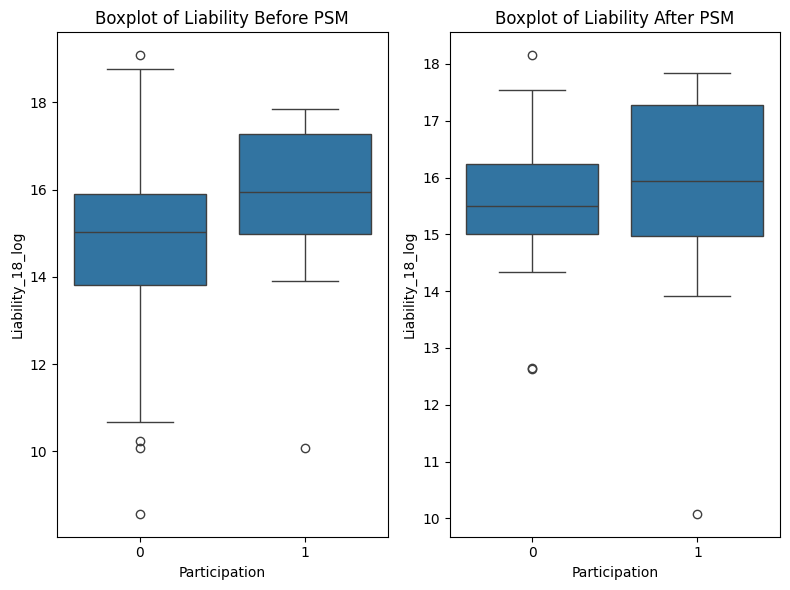

In [220]:
plt.figure(figsize=(8, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Participation', y='Liability_18_log')
plt.title('Boxplot of Liability Before PSM')
plt.xlabel('Participation')
plt.ylabel('Liability_18_log')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Participation', y='Liability_18_log')
plt.title('Boxplot of Liability After PSM')
plt.xlabel('Participation')
plt.ylabel('Liability_18_log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

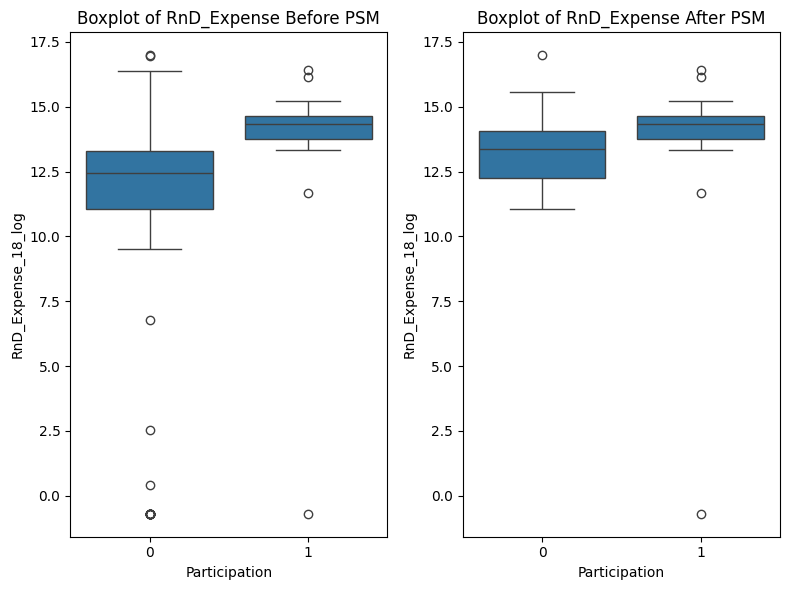

In [221]:
plt.figure(figsize=(8, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Participation', y='RnD_Expense_18_log')
plt.title('Boxplot of RnD_Expense Before PSM')
plt.xlabel('Participation')
plt.ylabel('RnD_Expense_18_log')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Participation', y='RnD_Expense_18_log')
plt.title('Boxplot of RnD_Expense After PSM')
plt.xlabel('Participation')
plt.ylabel('RnD_Expense_18_log')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [222]:
#IQR은 Q3(75%)에서 Q1(25%)를 뺀 값이다. IQR을 사용하여 이상치를 판단하는 기준: Q1−1.5∗IQR 보다 작거나, Q3+1.5∗IQR 보다 크거나
# IQR 기준 이상치 확인하는 함수
def findOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5 * iqr)) | (x[column] < (q1 - 1.5 * iqr))]
    return len(y)
# 상시근로자수, 매출액, 부채총액에 대한 IQR 기준 이상치 개수 확인
print("연구개발비 IQR outliers:", findOutliers(df1, 'RnD_Expense_18_log'))

연구개발비 IQR outliers: 4


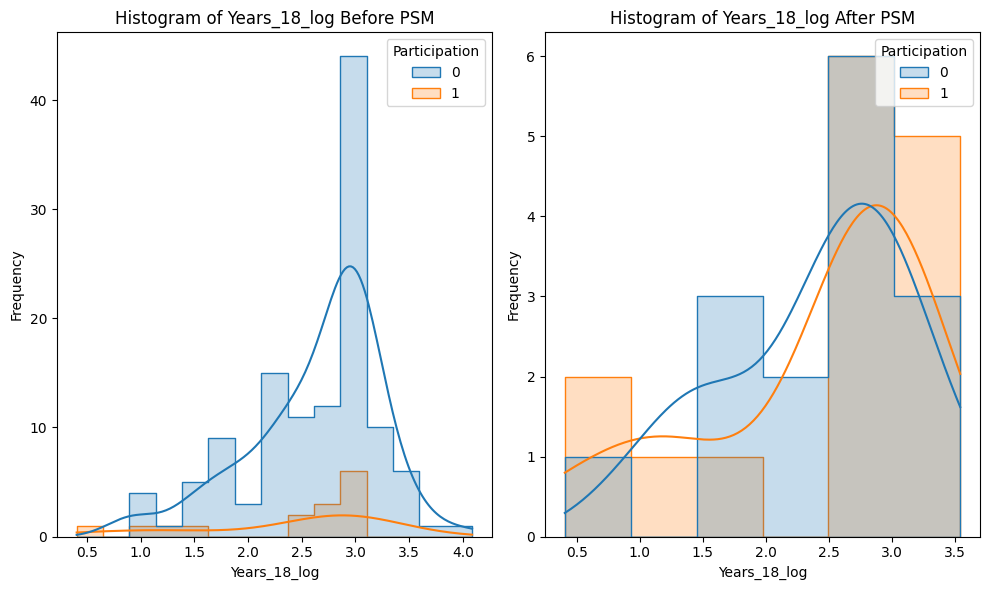

In [223]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Years_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Years_18_log Before PSM')
plt.xlabel('Years_18_log')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Years_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Years_18_log After PSM')  # Corrected title
plt.xlabel('Years_18_log')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


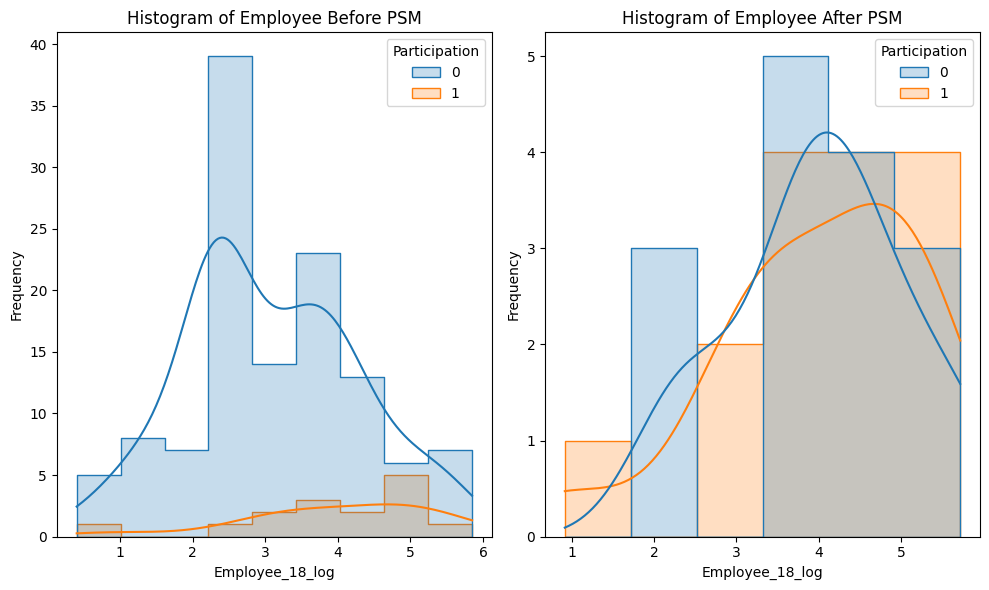

In [224]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Employee_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Employee Before PSM')
plt.xlabel('Employee_18_log')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Employee_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Employee After PSM')  # Corrected title
plt.xlabel('Employee_18_log')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


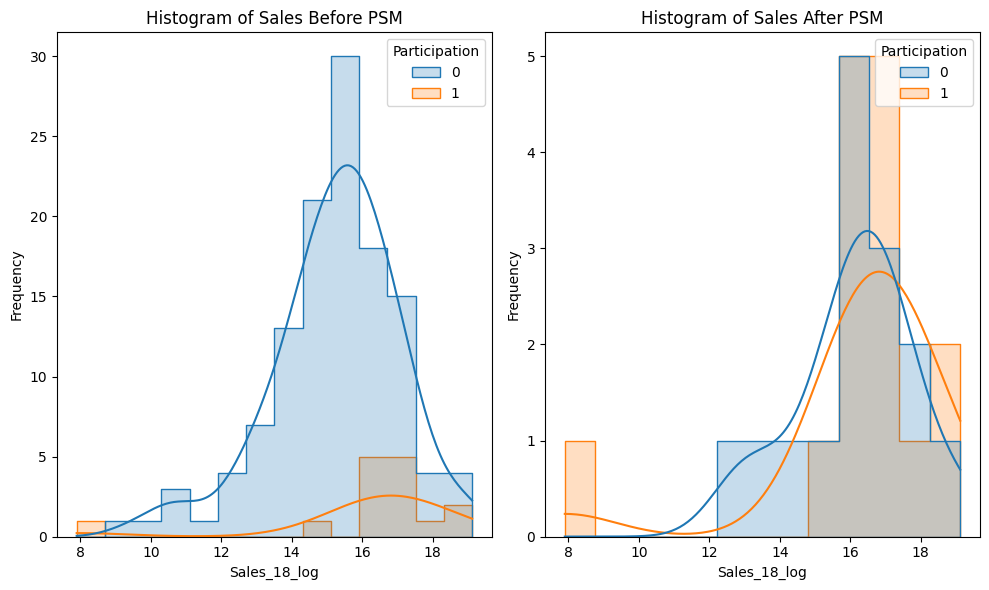

In [225]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Sales_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Sales Before PSM')
plt.xlabel('Sales_18_log')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Sales_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Sales After PSM')  # Corrected title
plt.xlabel('Sales_18_log')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


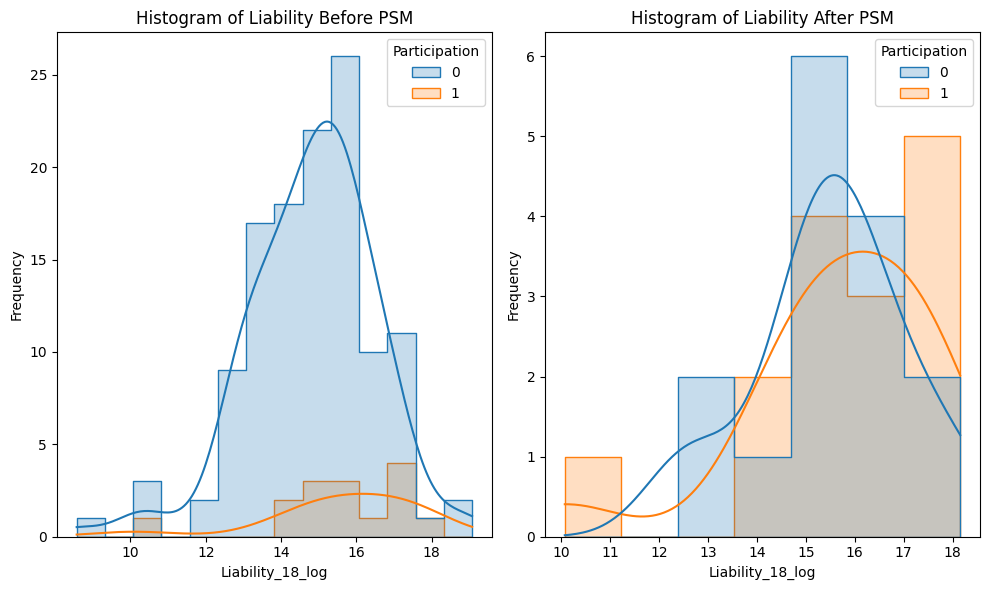

In [227]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Liability_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Liability Before PSM')
plt.xlabel('Liability_18_log')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Liability_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of Liability After PSM')  # Corrected title
plt.xlabel('Liability_18_log')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

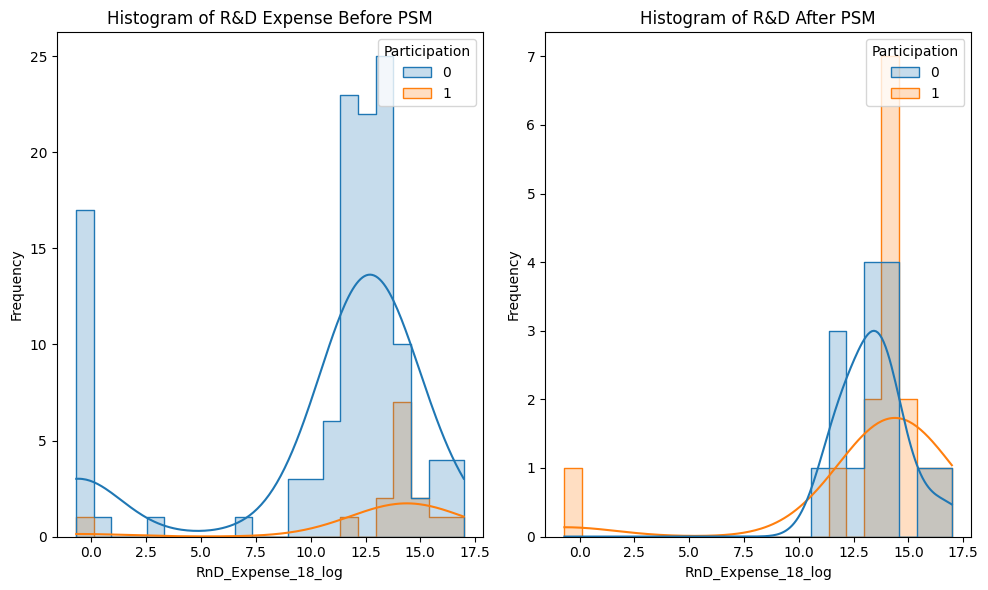

In [237]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='RnD_Expense_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of R&D Expense Before PSM')
plt.xlabel('RnD_Expense_18_log')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='RnD_Expense_18_log', hue='Participation', element='step', kde=True)
plt.title('Histogram of R&D After PSM')  # Corrected title
plt.xlabel('RnD_Expense_18_log')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


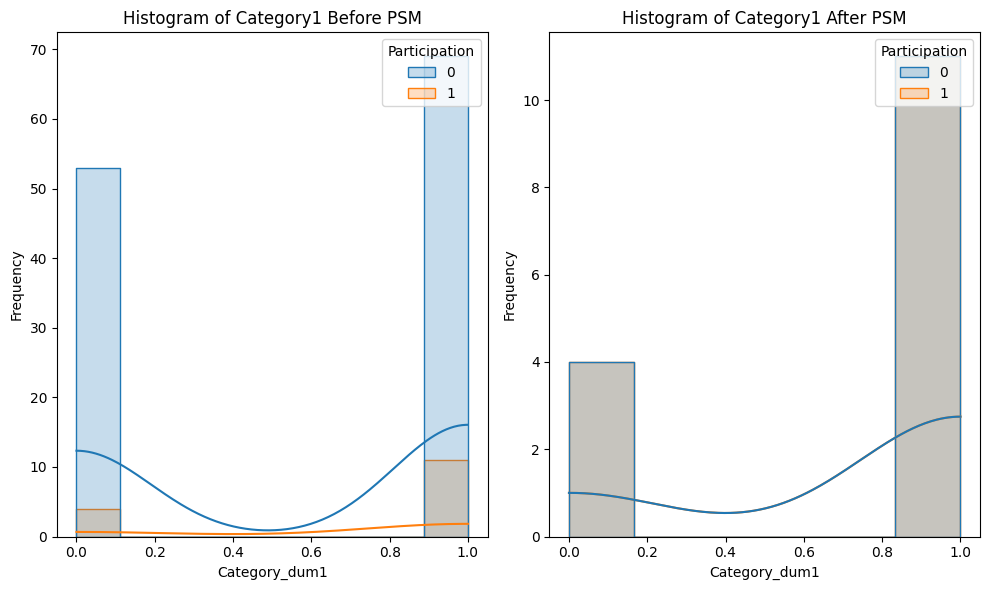

In [229]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Category_dum1', hue='Participation', element='step', kde=True)
plt.title('Histogram of Category1 Before PSM')
plt.xlabel('Category_dum1')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Category_dum1', hue='Participation', element='step', kde=True)
plt.title('Histogram of Category1 After PSM')  # Corrected title
plt.xlabel('Category_dum1')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


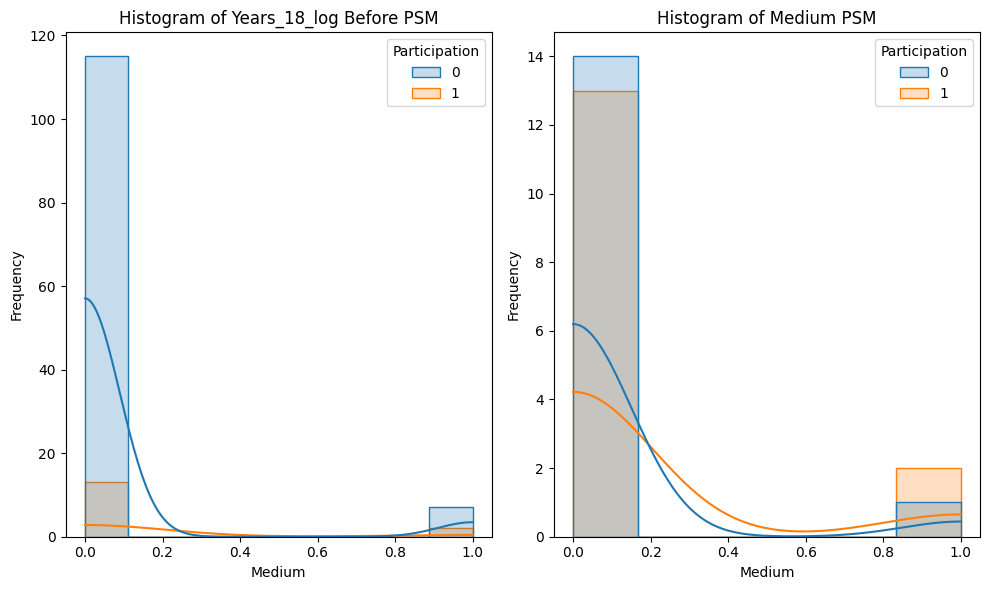

In [230]:
plt.figure(figsize=(10, 6))

# First subplot (Before PSM)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Medium', hue='Participation', element='step', kde=True)
plt.title('Histogram of Years_18_log Before PSM')
plt.xlabel('Medium')
plt.ylabel('Frequency')

# Second subplot (After PSM)
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='Medium', hue='Participation', element='step', kde=True)
plt.title('Histogram of Medium PSM')  # Corrected title
plt.xlabel('Medium')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### logistic_ps2

In [231]:
# Years_18_log + Employee_18_log + Sales_18_log + Debt_18_log + RnD_18_log + Category_dum1+ Medium
import pandas as pd
df2 = pd.read_excel('/content/240508_matchedlogistic2.xlsx')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

In [232]:
Parti = df[df.Participation==1]
Non_parti = df[df.Participation==0]

In [233]:
Parti2 = df2[df2.Participation==1]
Non_parti2 = df2[df2.Participation==0]

In [234]:
df2.groupby('Participation').mean(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98.80000,27678481.93333,15766926.46667,2399185.66667,13.73333,0.80000,0.20000,0.86667,0.00000,0.06667,0.00000,0.00000,0.06667,0.00000,0.00000,0.00000,0.00000,0.06667,0.93333,0.60000,0.20000,0.13333,0.06667,2.51739,4.07366,16.27985,15.77955,13.28038,0.06667,0.22441,0.25052,0.23411,0.25052,1.00000,8.00000
1,93.60000,31087053.13333,16507773.06667,2874336.80000,13.53333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.53333,0.26667,0.20000,0.00000,2.38022,4.02578,16.27696,15.67554,13.35188,0.13333,0.32642,0.25445,0.24013,0.25445,1.00000,8.00000


In [235]:
df2.groupby('Participation').std(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,90.96718,49321660.79743,20191260.30503,6045207.12774,6.48588,0.41404,0.41404,0.35187,0.00000,0.25820,0.00000,0.00000,0.25820,0.00000,0.00000,0.00000,0.00000,0.25820,0.25820,0.50709,0.41404,0.35187,0.25820,0.59666,1.23105,1.41706,1.49708,1.52219,0.25820,0.20323,0.16601,0.16518,0.16601,0.00000,4.47214
1,83.14600,33878779.19879,17606214.89470,3839588.10660,7.50111,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.51640,0.45774,0.41404,0.00000,0.89379,1.25033,2.50445,1.96613,4.04358,0.35187,0.22123,0.17001,0.15889,0.17001,0.00000,4.47214


In [238]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df2[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


In [239]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti2['Years_18_log'], Non_parti2['Years_18_log'])
print("Years_18_log - Statistic:", statistic)
print("Years_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti2['Sales_18'], Non_parti2['Sales_18'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

 # 부채총액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti2['Liability_18_log'], Non_parti2['Liability_18_log'])
print("Liability_log - Statistic:", statistic)
print("Liability_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 부채총액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 부채총액의 중앙값은 서로 동일합니다.")

# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti2['RnD_Expense_18'], Non_parti2['RnD_Expense_18'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_18_log - Statistic: 115.0
Years_18_log - p-value: 0.9335388445478225
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 128.0
Sales_18_log - p-value: 0.5338294217441396
귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.
Liability_log - Statistic: 114.0
Liability_log - p-value: 0.9669147771731937
귀무가설을 채택합니다. 두 그룹의 부채총액의 중앙값은 서로 동일합니다.
RnD_Expense_18_log - Statistic: 164.0
RnD_Expense_18_log - p-value: 0.03439744889250225
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


In [241]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Years_18_log'], Non_parti['Years_18_log'])
print("Years_23_log - Statistic:", statistic)
print("Years_23_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Sales_18_log'], Non_parti['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")


# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['RnD_Expense_18_log'], Non_parti['RnD_Expense_18_log'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_23_log - Statistic: 837.0
Years_23_log - p-value: 0.5923945132432562
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 1363.0
Sales_18_log - p-value: 0.0020373011817517335
귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.
RnD_Expense_18_log - Statistic: 1468.5
RnD_Expense_18_log - p-value: 0.00013546910794966634
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


In [242]:
from scipy.stats import levene, bartlett

participating = df2[df2['Participation'] == 1]['Employee_18_log']
non_participating = df2[df2['Participation'] == 0]['Employee_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df2[df2['Participation'] == 1]['Employee_18_log']
non_participating = df2[df2['Participation'] == 0]['Employee_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.07528698386878957
p-value: 0.7858032511143863

Bartlett's test:
Statistic: 0.0032671323366418523
p-value: 0.9544186700016334
t-statistic: -0.10567117909131246
p-value: 0.916596661177413
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [243]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

In [246]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df2[df2['Participation'] == 1][columns_of_interest]
control_covariates = df2[df2['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.18051
Employee_18_log,-0.03859
Sales_18_log,-0.00142
Liability_18_log,-0.05952
RnD_Expense_18_log,0.02340
Category_dum1,-0.15275
Category_dum2,0.15275
Code_C26,0.53589
Code_C28,-0.36515
Code_C27,NaN


In [247]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df[df['Participation'] == 1][columns_of_interest]
control_covariates = df[df['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.33351
Employee_18_log,0.76953
Sales_18_log,0.47176
Liability_18_log,0.46743
RnD_Expense_18_log,0.58353
Category_dum1,0.35085
Category_dum2,-0.35085
Code_C26,0.60490
Code_C28,-0.32031
Code_C27,-0.18182


<Figure size 1900x1000 with 0 Axes>

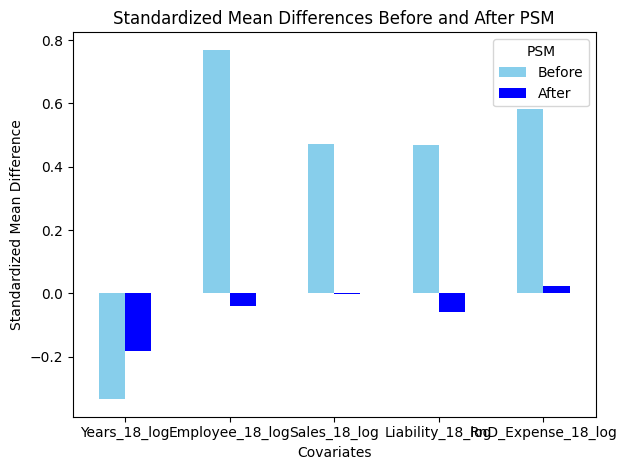

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df2[df2['Participation'] == 1][columns_of_interest]
control_covariates_after = df2[df2['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=0)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

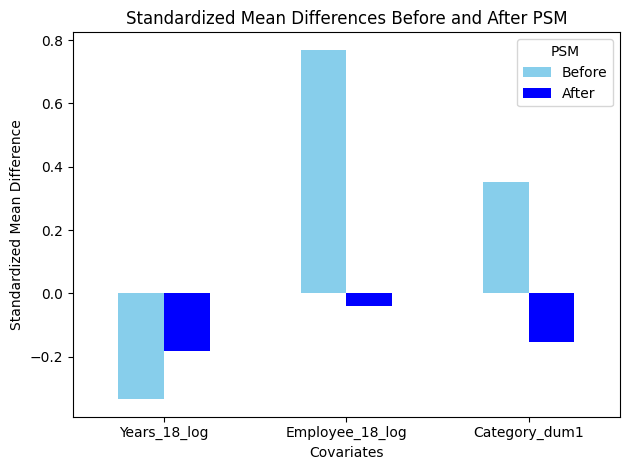

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Category_dum1']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df2[df2['Participation'] == 1][columns_of_interest]
control_covariates_after = df2[df2['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=0)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

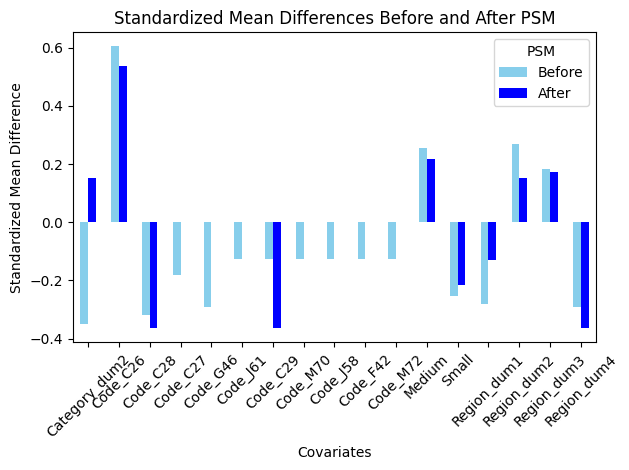

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Category_dum2','Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small','Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df2[df2['Participation'] == 1][columns_of_interest]
control_covariates_after = df2[df2['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

### logistic_ps3

In [252]:
# Years_18_log + Employee_18_log + Category_dum1
import pandas as pd
df3 = pd.read_excel('/content/240508_matchedlogistic3.xlsx')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

In [253]:
Parti = df[df.Participation==1]
Non_parti = df[df.Participation==0]

In [254]:
Parti3 = df3[df3.Participation==1]
Non_parti3 = df3[df3.Participation==0]

In [255]:
df3.groupby('Participation').mean(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.40000,28739714.06667,16173670.60000,2804015.86667,12.40000,0.73333,0.26667,0.66667,0.06667,0.06667,0.06667,0.06667,0.00000,0.00000,0.00000,0.00000,0.06667,0.13333,0.86667,0.66667,0.20000,0.00000,0.13333,2.37755,4.01446,16.17180,15.78645,11.64350,0.06667,0.17738,0.22701,0.23899,0.23899,1.00000,8.00000
1,93.60000,31087053.13333,16507773.06667,2874336.80000,13.53333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.53333,0.26667,0.20000,0.00000,2.38022,4.02578,16.27696,15.67554,13.35188,0.13333,0.32642,0.25445,0.24013,0.24013,1.00000,8.00000


In [256]:
df3.groupby('Participation').std(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,83.59665,51323726.68140,20152481.29763,6594094.27147,8.06049,0.45774,0.45774,0.48795,0.25820,0.25820,0.25820,0.25820,0.00000,0.00000,0.00000,0.00000,0.25820,0.35187,0.35187,0.48795,0.41404,0.00000,0.35187,0.62762,0.94499,1.47958,1.55054,5.20286,0.25820,0.20960,0.17356,0.16596,0.16596,0.00000,4.47214
1,83.14600,33878779.19879,17606214.89470,3839588.10660,7.50111,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.51640,0.45774,0.41404,0.00000,0.89379,1.25033,2.50445,1.96613,4.04358,0.35187,0.22123,0.17001,0.15889,0.15889,0.00000,4.47214


In [258]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df3[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


In [259]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti3['Years_18_log'], Non_parti3['Years_18_log'])
print("Years_18_log - Statistic:", statistic)
print("Years_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti3['Sales_18'], Non_parti3['Sales_18'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")

 # 부채총액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti3['Liability_18_log'], Non_parti3['Liability_18_log'])
print("Liability_log - Statistic:", statistic)
print("Liability_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 부채총액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 부채총액의 중앙값은 서로 동일합니다.")

# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti3['RnD_Expense_18'], Non_parti3['RnD_Expense_18'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_18_log - Statistic: 128.0
Years_18_log - p-value: 0.5328251598365585
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 139.0
Sales_18_log - p-value: 0.28084201086629845
귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.
Liability_log - Statistic: 112.0
Liability_log - p-value: 1.0
귀무가설을 채택합니다. 두 그룹의 부채총액의 중앙값은 서로 동일합니다.
RnD_Expense_18_log - Statistic: 169.0
RnD_Expense_18_log - p-value: 0.020135895214302722
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


In [260]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Years_18_log'], Non_parti['Years_18_log'])
print("Years_23_log - Statistic:", statistic)
print("Years_23_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['Sales_18_log'], Non_parti['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")


# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti['RnD_Expense_18_log'], Non_parti['RnD_Expense_18_log'])
print("RnD_18_log - Statistic:", statistic)
print("RnD_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_23_log - Statistic: 837.0
Years_23_log - p-value: 0.5923945132432562
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 1363.0
Sales_18_log - p-value: 0.0020373011817517335
귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.
RnD_18_log - Statistic: 1468.5
RnD_18_log - p-value: 0.00013546910794966634
귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.


In [261]:
from scipy.stats import levene, bartlett

participating = df3[df3['Participation'] == 1]['Employee_18_log']
non_participating = df3[df3['Participation'] == 0]['Employee_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df3[df3['Participation'] == 1]['Employee_18_log']
non_participating = df3[df3['Participation'] == 0]['Employee_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 1.301240268065213
p-value: 0.26365010670808925

Bartlett's test:
Statistic: 1.0461156237001732
p-value: 0.30640339278045176
t-statistic: 0.02797753218567631
p-value: 0.9778785300155504
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [262]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df3[df3['Participation'] == 1][columns_of_interest]
control_covariates = df3[df3['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,0.00346
Employee_18_log,0.01022
Sales_18_log,0.05113
Liability_18_log,-0.06265
RnD_Expense_18_log,0.36665
Category_dum1,0.00000
Category_dum2,0.00000
Code_C26,0.96609
Code_C28,-0.36515
Code_C27,-0.36515


In [263]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df[df['Participation'] == 1][columns_of_interest]
control_covariates = df[df['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,-0.33351
Employee_18_log,0.76953
Sales_18_log,0.47176
Liability_18_log,0.46743
RnD_Expense_18_log,0.58353
Category_dum1,0.35085
Category_dum2,-0.35085
Code_C26,0.60490
Code_C28,-0.32031
Code_C27,-0.18182


<Figure size 1900x1000 with 0 Axes>

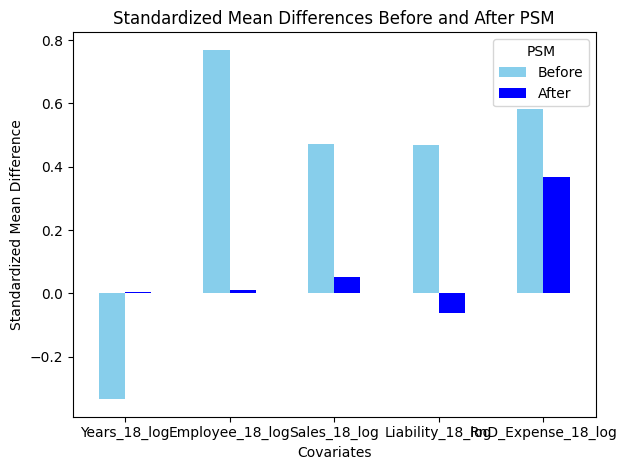

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df3[df3['Participation'] == 1][columns_of_interest]
control_covariates_after = df3[df3['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=0)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

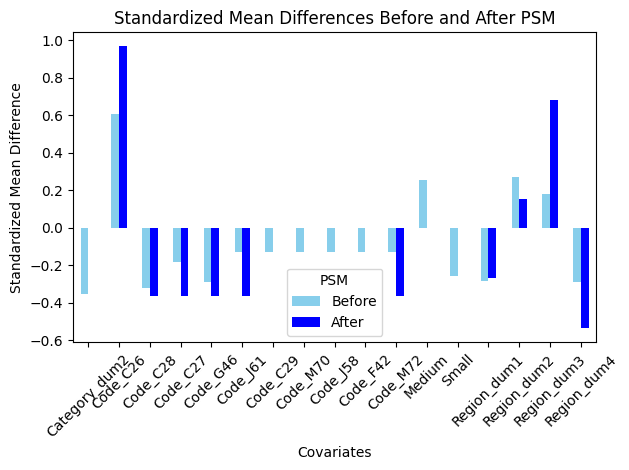

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Category_dum2','Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4'
]

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df3[df3['Participation'] == 1][columns_of_interest]
control_covariates_after = df3[df3['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45)
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

### 프로빗

In [266]:
# Years_18_log + Employee_18_log + Sales_18_log + Debt_18_log + RnD_18_log + Category_dum1 + Category_dum2 + Code_C26 + Code_C28 + Code_C27 + Code_G46 + J61210 + C29229 + M70121 + J58221 + F42321 + M72919 + Medium + Small + 수도권 + 전라권 + 충청권 + 경상권
import pandas as pd
df4 = pd.read_excel('/content/240508_matchedprobit.xlsx')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30 non-null     object 
 1   Category            30 non-null     object 
 2   Code                30 non-null     object 
 3   Size                30 non-null     object 
 4   Region              30 non-null     object 
 5   State               30 non-null     object 
 6   Employee_18         30 non-null     int64  
 7   Sales_18            30 non-null     int64  
 8   Liability_18        30 non-null     int64  
 9   RnD_Expense_18      30 non-null     int64  
 10  Participation       30 non-null     int64  
 11  Years_18            30 non-null     int64  
 12  Category_dum1       30 non-null     int64  
 13  Category_dum2       30 non-null     int64  
 14  Code_C26            30 non-null     int64  
 15  Code_C27            30 non-null     int64  
 16  Code_C28  

In [267]:
Parti = df[df.Participation==1]
Non_parti = df[df.Participation==0]

Parti4= df4[df4.Participation==1]
Non_parti4 = df4[df4.Participation==0]

In [268]:
df4.groupby('Participation').mean(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,99.60000,35327335.86667,21522561.00000,3440226.73333,12.40000,0.60000,0.40000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.66667,0.26667,0.06667,0.00000,2.35640,4.11269,16.11259,15.50484,13.67488,0.06667,0.27859,0.25607,0.22768,0.27984,1.00000,8.00000
1,93.60000,31087053.13333,16507773.06667,2874336.80000,13.53333,0.73333,0.26667,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.13333,0.86667,0.53333,0.26667,0.20000,0.00000,2.38022,4.02578,16.27696,15.67554,13.35188,0.13333,0.32642,0.25445,0.24013,0.31120,1.00000,8.00000


In [269]:
df4.groupby('Participation').std(numeric_only=True)

,Employee_18,Sales_18,Liability_18,RnD_Expense_18,Years_18,Category_dum1,Category_dum2,Code_C26,Code_C27,Code_C28,Code_G46,Code_J61,Code_C29,Code_M70,Code_J58,Code_F42,Code_M72,Medium,Small,Region_dum1,Region_dum2,Region_dum3,Region_dum4,Years_18_log,Employee_18_log,Sales_18_log,Liability_18_log,RnD_Expense_18_log,logistic_ps0,logistic_ps1,logistic_ps2,logistic_ps3,distance,weights,subclass
Participation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94.90883,60955408.14981,38554913.62295,6522728.15440,7.32705,0.50709,0.50709,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.48795,0.45774,0.25820,0.00000,0.71409,1.11955,1.80777,1.84977,1.73381,0.25820,0.18399,0.17129,0.16509,0.17634,0.00000,4.47214
1,83.14600,33878779.19879,17606214.89470,3839588.10660,7.50111,0.45774,0.45774,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.35187,0.35187,0.51640,0.45774,0.41404,0.00000,0.89379,1.25033,2.50445,1.96613,4.04358,0.35187,0.22123,0.17001,0.15889,0.19828,0.00000,4.47214


In [271]:
from scipy.stats import shapiro
columns = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log']
for col in columns:
    # 샤피로-윌크 테스트 수행
    statistic, p_value = shapiro(df4[col])
    # 결과 해석
    alpha = 0.05
    if p_value > alpha:
        print(f"{col}: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)")
    else:
        print(f"{col}: 정규분포를 따르지 않습니다 (귀무가설을 기각)")

Years_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Employee_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
Sales_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)
Liability_18_log: 정규분포를 따릅니다 (귀무가설을 기각하지 않음)
RnD_Expense_18_log: 정규분포를 따르지 않습니다 (귀무가설을 기각)


In [272]:
from scipy.stats import mannwhitneyu
# 유의수준 설정
alpha = 0.05

# 업력에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti4['Years_18_log'], Non_parti4['Years_18_log'])
print("Years_18_log - Statistic:", statistic)
print("Years_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 업력의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.")

# 매출액에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti4['Sales_18_log'], Non_parti4['Sales_18_log'])
print("Sales_18_log - Statistic:", statistic)
print("Sales_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 매출액의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.")


# 연구개발비에 대한 Mann-Whitney U 검정
statistic, p_value = mannwhitneyu(Parti4['RnD_Expense_18'], Non_parti4['RnD_Expense_18'])
print("RnD_Expense_18_log - Statistic:", statistic)
print("RnD_Expense_18_log - p-value:", p_value)
# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 그룹의 연구개발비의 중앙값은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.")

Years_18_log - Statistic: 124.5
Years_18_log - p-value: 0.6319959380827587
귀무가설을 채택합니다. 두 그룹의 업력의 중앙값은 서로 동일합니다.
Sales_18_log - Statistic: 131.0
Sales_18_log - p-value: 0.4553018964198552
귀무가설을 채택합니다. 두 그룹의 매출액의 중앙값은 서로 동일합니다.
RnD_Expense_18_log - Statistic: 140.0
RnD_Expense_18_log - p-value: 0.26275304114766074
귀무가설을 채택합니다. 두 그룹의 연구개발비의 중앙값은 서로 동일합니다.


In [273]:
from scipy.stats import levene, bartlett

participating = df4[df4['Participation'] == 1]['Employee_18_log']
non_participating = df4[df4['Participation'] == 0]['Employee_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df4[df4['Participation'] == 1]['Employee_18_log']
non_participating = df4[df4['Participation'] == 0]['Employee_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.13321145593087239
p-value: 0.7178676964523123

Bartlett's test:
Statistic: 0.16465649168109284
p-value: 0.6849050852011828
t-statistic: -0.20054411408057077
p-value: 0.8425046317061171
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [275]:
from scipy.stats import levene, bartlett

participating = df4[df4['Participation'] == 1]['Liability_18_log']
non_participating = df4[df4['Participation'] == 0]['Liability_18_log']

# Levene's test를 사용한 등분산 검정
stat_levene, p_value_levene = levene(participating, non_participating)
print("Levene's test:")
print("Statistic:", stat_levene)
print("p-value:", p_value_levene)

# Bartlett's test를 사용한 등분산 검정
stat_bartlett, p_value_bartlett = bartlett(participating, non_participating)
print("\nBartlett's test:")
print("Statistic:", stat_bartlett)
print("p-value:", p_value_bartlett)
#  p-value가 유의수준보다 작다면, 귀무가설을 기각하고 등분산이 아님

from scipy.stats import ttest_ind
participating = df4[df4['Participation'] == 1]['Liability_18_log']
non_participating = df4[df4['Participation'] == 0]['Liability_18_log']

t_statistic, p_value = ttest_ind(participating, non_participating)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value를 통해 유의수준에 따라 귀무가설을 기각 또는 채택할 수 있습니다.
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 집단의 평균은 서로 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.")

Levene's test:
Statistic: 0.0008231129368059579
p-value: 0.9773153926542363

Bartlett's test:
Statistic: 0.05026817699254397
p-value: 0.8225972812409534
t-statistic: 0.24489206986158252
p-value: 0.8083258925913488
귀무가설을 채택합니다. 두 집단의 평균은 서로 동일합니다.


In [276]:
import numpy as np

# Define the columns of interest for balance testing
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1', 'Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# Exclude '참여여부' from the calculation of means and standard deviations
treated_covariates = df4[df4['Participation'] == 1][columns_of_interest]
control_covariates = df4[df4['Participation'] == 0][columns_of_interest]

# Calculate means and standard deviations for each group
treated_means = treated_covariates.mean()
control_means = control_covariates.mean()
treated_stds = treated_covariates.std()
control_stds = control_covariates.std()

# Compute standardized mean differences (SMD) for each covariate
SMDs = (treated_means - control_means) / np.sqrt((treated_stds**2 + control_stds**2) / 2)

# Create a DataFrame to store the SMD values
SMD_df = pd.DataFrame(SMDs, columns=['SMD'])

# Display the SMDs DataFrame
print("Standardized Mean Differences (SMDs) for selected columns:")
SMD_df


Standardized Mean Differences (SMDs) for selected columns:


,SMD
Years_18_log,0.02945
Employee_18_log,-0.07323
Sales_18_log,0.07526
Liability_18_log,0.08942
RnD_Expense_18_log,-0.10383
Category_dum1,0.27603
Category_dum2,-0.27603
Code_C26,NaN
Code_C28,NaN
Code_C27,NaN


<Figure size 1900x1000 with 0 Axes>

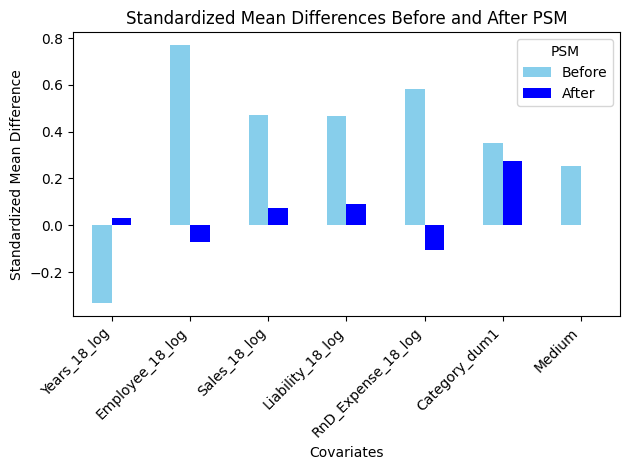

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Years_18_log', 'Employee_18_log', 'Sales_18_log', 'Liability_18_log', 'RnD_Expense_18_log','Category_dum1','Medium']


# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df4[df4['Participation'] == 1][columns_of_interest]
control_covariates_after = df4[df4['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

<Figure size 1900x1000 with 0 Axes>

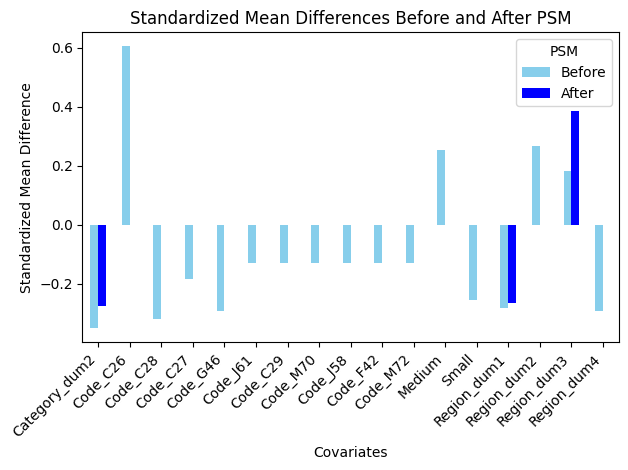

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터 생성 (실제 데이터로 대체 필요)
# df는 PSM 이전 데이터프레임이며, df1은 PSM 이후 데이터프레임입니다.
# columns_of_interest는 분석하려는 특성의 열 이름 목록입니다.
columns_of_interest = ['Category_dum2', 'Code_C26','Code_C28','Code_C27','Code_G46','Code_J61','Code_C29','Code_M70','Code_J58','Code_F42','Code_M72','Medium','Small', 'Region_dum1','Region_dum2','Region_dum3','Region_dum4']

# PSM 이전의 SMD 계산
treated_covariates_before = df[df['Participation'] == 1][columns_of_interest]
control_covariates_before = df[df['Participation'] == 0][columns_of_interest]
treated_means_before = treated_covariates_before.mean()
control_means_before = control_covariates_before.mean()
treated_stds_before = treated_covariates_before.std()
control_stds_before = control_covariates_before.std()
SMDs_before = (treated_means_before - control_means_before) / np.sqrt((treated_stds_before**2 + control_stds_before**2) / 2)

# PSM 이후의 SMD 계산
treated_covariates_after = df4[df4['Participation'] == 1][columns_of_interest]
control_covariates_after = df4[df4['Participation'] == 0][columns_of_interest]
treated_means_after = treated_covariates_after.mean()
control_means_after = control_covariates_after.mean()
treated_stds_after = treated_covariates_after.std()
control_stds_after = control_covariates_after.std()
SMDs_after = (treated_means_after - control_means_after) / np.sqrt((treated_stds_after**2 + control_stds_after**2) / 2)

# 두 DataFrame의 SMD 값을 병합
SMD_df = pd.DataFrame({
    'SMD_before': SMDs_before,
    'SMD_after': SMDs_after
})

# 시각화
plt.figure(figsize=(19, 10))
SMD_df.plot(kind='bar', color=['skyblue', 'Blue'])
plt.title('Standardized Mean Differences Before and After PSM')
plt.xlabel('Covariates')
plt.ylabel('Standardized Mean Difference')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PSM', labels=['Before', 'After'])
plt.tight_layout()
plt.show()

# DID(순효과 측정)

In [280]:
import pandas as pd
data = pd.read_excel('/content/분석데이터.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                153 non-null    int64  
 1   Name                  153 non-null    object 
 2   Category              153 non-null    object 
 3   Employee_18           82 non-null     float64
 4   Employee_19           107 non-null    float64
 5   Employee_20           91 non-null     float64
 6   Employee_21           74 non-null     float64
 7   Employee_22           70 non-null     float64
 8   Sales_18              153 non-null    int64  
 9   Sales_19              153 non-null    int64  
 10  Sales_20              153 non-null    int64  
 11  Sales_21              153 non-null    int64  
 12  Sales_22              153 non-null    int64  
 13  Operating_Income_18   152 non-null    float64
 14  Operating_Income_19   153 non-null    int64  
 15  Operating_Income_20   1

In [281]:
# "광선로(케이블)"인 행 제거
import pandas as pd
data = data[data['Category'] != '광선로(케이블)']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 152
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                143 non-null    int64  
 1   Name                  143 non-null    object 
 2   Category              143 non-null    object 
 3   Employee_18           76 non-null     float64
 4   Employee_19           97 non-null     float64
 5   Employee_20           86 non-null     float64
 6   Employee_21           69 non-null     float64
 7   Employee_22           65 non-null     float64
 8   Sales_18              143 non-null    int64  
 9   Sales_19              143 non-null    int64  
 10  Sales_20              143 non-null    int64  
 11  Sales_21              143 non-null    int64  
 12  Sales_22              143 non-null    int64  
 13  Operating_Income_18   142 non-null    float64
 14  Operating_Income_19   143 non-null    int64  
 15  Operating_Income_20   142 no

In [282]:
data['Sales_18'].eq(0).sum()

6

In [283]:
data = data[data['Sales_18'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 1 to 152
Data columns (total 94 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                137 non-null    int64  
 1   Name                  137 non-null    object 
 2   Category              137 non-null    object 
 3   Employee_18           76 non-null     float64
 4   Employee_19           96 non-null     float64
 5   Employee_20           84 non-null     float64
 6   Employee_21           66 non-null     float64
 7   Employee_22           62 non-null     float64
 8   Sales_18              137 non-null    int64  
 9   Sales_19              137 non-null    int64  
 10  Sales_20              137 non-null    int64  
 11  Sales_21              137 non-null    int64  
 12  Sales_22              137 non-null    int64  
 13  Operating_Income_18   137 non-null    float64
 14  Operating_Income_19   137 non-null    int64  
 15  Operating_Income_20   136 no